In [1]:
import warnings
warnings.filterwarnings("ignore")

# DATA MANIPULATION

In [2]:
import pandas as pd
# openpyxl kütüphanesini yükleme
try:
    import openpyxl
except ImportError:
    print("openpyxl kütüphanesi bulunamadı. Yükleniyor...")
    import sys
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])
    print("openpyxl kütüphanesi başarıyla yüklendi.")
    import openpyxl

students = pd.read_excel("./students.xlsx")
students.head(10)

,gpa,avg_exam_score,absent_rate,daily_study,cram_school,private_lesson,private_room,parent_edu,study_resources,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
0,79.0,350,0.00,240,no,yes,yes,p,yes,10,4,360.0,180,364
1,94.0,350,0.10,400,no,yes,yes,u,yes,7,6,360.0,150,382
2,90.0,468,0.20,30,no,no,yes,u,yes,10,3,300.0,240,420
3,82.0,450,0.00,360,no,no,yes,h,no,2,9,480.0,60,460
4,84.0,440,0.13,360,yes,no,no,m,yes,2,8,660.0,45,475
5,84.0,415,0.13,360,yes,no,no,h,yes,3,9,660.0,45,475
6,98.0,460,0.10,350,no,yes,yes,u,yes,10,6,450.0,30,460
7,89.0,425,0.30,300,yes,no,no,h,yes,10,5,400.0,350,420
8,87.0,410,0.25,300,yes,yes,no,u,yes,8,5,480.0,240,440
9,88.0,400,0.03,300,yes,no,yes,u,yes,6,5,420.0,300,420


In [3]:
type(students)

pandas.core.frame.DataFrame

In [4]:
students.axes #index bilgisi bastirma (satir-sutun bilgisi)

[RangeIndex(start=0, stop=501, step=1),
 Index(['gpa', 'avg_exam_score', 'absent_rate', 'daily_study', 'cram_school',
        'private_lesson', 'private_room', 'parent_edu', 'study_resources',
        'anxiety_score', 'motivation_score', 'avg_sleep_time',
        'daily_social_media', 'university_exam_score'],
       dtype='object')]

In [5]:
students.shape #boyut bilgisi

(501, 14)

In [6]:
students.ndim    #boyut sayisi --> pandas df ler icin her zaman 2 boyutludur

2

In [7]:
students.size

7014

In [8]:
students.count()

gpa                      501
avg_exam_score           501
absent_rate              501
daily_study              501
cram_school              501
private_lesson           500
private_room             501
parent_edu               501
study_resources          501
anxiety_score            501
motivation_score         501
avg_sleep_time           437
daily_social_media       501
university_exam_score    501
dtype: int64

In [9]:
students.describe().T #butun numeric degiskenler icin temel betimsel (dagilimsal) istatistikeri tek tabloda bastirmak

,count,mean,std,min,25%,50%,75%,max
gpa,501.0,106.344711,88.900072,33.0,70.50,81.8,91.00,454.0
avg_exam_score,501.0,359.810379,61.708071,90.0,315.00,365.0,401.00,520.0
absent_rate,501.0,0.142335,0.150077,0.0,0.05,0.1,0.18,1.0
daily_study,501.0,189.858283,114.304059,0.0,100.00,179.0,285.00,600.0
anxiety_score,501.0,5.043912,2.462939,0.0,3.00,5.0,7.00,10.0
motivation_score,501.0,5.752495,2.377103,0.0,4.00,6.0,7.00,10.0
avg_sleep_time,437.0,426.517162,73.624062,60.0,380.00,420.0,480.00,720.0
daily_social_media,501.0,117.039920,92.714392,0.0,50.00,100.0,150.00,613.0
university_exam_score,501.0,370.169661,66.491482,141.0,328.00,380.0,420.00,544.0


In [10]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gpa                    501 non-null    float64
 1   avg_exam_score         501 non-null    int64  
 2   absent_rate            501 non-null    float64
 3   daily_study            501 non-null    int64  
 4   cram_school            501 non-null    object 
 5   private_lesson         500 non-null    object 
 6   private_room           501 non-null    object 
 7   parent_edu             501 non-null    object 
 8   study_resources        501 non-null    object 
 9   anxiety_score          501 non-null    int64  
 10  motivation_score       501 non-null    int64  
 11  avg_sleep_time         437 non-null    float64
 12  daily_social_media     501 non-null    int64  
 13  university_exam_score  501 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 54.9+ KB


# DATA VISUALIZATION

In [11]:
df = students.copy()  # Tavsiye edilen ilk islem veri setinin yedegini alarak bu yedek uzerinde calismaktir

### veri setinin yapısal bilgilerine ulasmak 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gpa                    501 non-null    float64
 1   avg_exam_score         501 non-null    int64  
 2   absent_rate            501 non-null    float64
 3   daily_study            501 non-null    int64  
 4   cram_school            501 non-null    object 
 5   private_lesson         500 non-null    object 
 6   private_room           501 non-null    object 
 7   parent_edu             501 non-null    object 
 8   study_resources        501 non-null    object 
 9   anxiety_score          501 non-null    int64  
 10  motivation_score       501 non-null    int64  
 11  avg_sleep_time         437 non-null    float64
 12  daily_social_media     501 non-null    int64  
 13  university_exam_score  501 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 54.9+ KB


In [13]:
df.dtypes #degiskenler ve veri tipleri

gpa                      float64
avg_exam_score             int64
absent_rate              float64
daily_study                int64
cram_school               object
private_lesson            object
private_room              object
parent_edu                object
study_resources           object
anxiety_score              int64
motivation_score           int64
avg_sleep_time           float64
daily_social_media         int64
university_exam_score      int64
dtype: object

In [14]:
import pandas as pd

df.cram_school = pd.Categorical(df.cram_school)
df.private_lesson = pd.Categorical(df.private_lesson)
df.private_room = pd.Categorical(df.private_room)
df.parent_edu = pd.Categorical(df.parent_edu)
df.study_resources = pd.Categorical(df.study_resources)

In [15]:
df.dtypes #method degiskeninin veri tipi degisti

gpa                       float64
avg_exam_score              int64
absent_rate               float64
daily_study                 int64
cram_school              category
private_lesson           category
private_room             category
parent_edu               category
study_resources          category
anxiety_score               int64
motivation_score            int64
avg_sleep_time            float64
daily_social_media          int64
university_exam_score       int64
dtype: object

### Eksik Degerler Gecici Cözüm

In [16]:
df.isnull().values.any() #veri setinde hic eksik gozlem var mi?

np.True_

In [17]:
df.isnull().sum() #hangi degiskende kacar tane eksik(aykiri) gozlem(deger) var?

gpa                       0
avg_exam_score            0
absent_rate               0
daily_study               0
cram_school               0
private_lesson            1
private_room              0
parent_edu                0
study_resources           0
anxiety_score             0
motivation_score          0
avg_sleep_time           64
daily_social_media        0
university_exam_score     0
dtype: int64

In [18]:
df["avg_sleep_time"].fillna(df.avg_sleep_time.mean(),inplace=True) #ortalamayla doldurmak

df.dropna(inplace = True) #eksik degerlerin direkt silinmesi - 1 adet eksik kategorik değişkeni silmek için

In [19]:
df.info() #kontrol 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 500
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gpa                    500 non-null    float64 
 1   avg_exam_score         500 non-null    int64   
 2   absent_rate            500 non-null    float64 
 3   daily_study            500 non-null    int64   
 4   cram_school            500 non-null    category
 5   private_lesson         500 non-null    category
 6   private_room           500 non-null    category
 7   parent_edu             500 non-null    category
 8   study_resources        500 non-null    category
 9   anxiety_score          500 non-null    int64   
 10  motivation_score       500 non-null    int64   
 11  avg_sleep_time         500 non-null    float64 
 12  daily_social_media     500 non-null    int64   
 13  university_exam_score  500 non-null    int64   
dtypes: category(5), float64(3), int64(6)
memory usa

### Kategorik Degisken Ozetleri

#### 1)Sadece kategorik degiskenler ve ozetleri

In [20]:
cat_df = df.select_dtypes(include = ["category"])     #select_dtypes --> df icerisinde istedigimiz veri tipine gore degsiken secmek icin kullanilir.

In [21]:
cat_df.info() #veri setinin tek kategorik degiskeni icin info

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 500
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   cram_school      500 non-null    category
 1   private_lesson   500 non-null    category
 2   private_room     500 non-null    category
 3   parent_edu       500 non-null    category
 4   study_resources  500 non-null    category
dtypes: category(5)
memory usage: 7.2 KB


In [22]:
cat_df.dtypes #elimizde numeric degerler yok

cram_school        category
private_lesson     category
private_room       category
parent_edu         category
study_resources    category
dtype: object

In [23]:
cat_df.columns #sutunlarımız

Index(['cram_school', 'private_lesson', 'private_room', 'parent_edu',
       'study_resources'],
      dtype='object')

In [24]:
cat_df.shape #kaç gözlem var

(500, 5)

#### 2)Kategorik degiskenin siniflarina ve sinif sayisina erismek

In [25]:
cat_df.cram_school.unique() #kac farkli cram_school degiskeni var?

['no', 'yes', 'yes ']
Categories (3, object): ['no', 'yes', 'yes ']

In [26]:
# "yes " şeklindeki değişken bir hata , düzeltelim :
cat_df['cram_school'] = cat_df['cram_school'].astype(str).str.strip() #str.strip() Bu fonksiyon her bir gözlemdeki yazının başında ve sonunda varsa boşluk karakterlerini (space, tab vb.) siler.
cat_df['cram_school'] = cat_df['cram_school'].astype('category')

In [27]:
cat_df.cram_school.unique() #kontrol

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [28]:
cat_df["cram_school"].value_counts().count() #saymak icin:

np.int64(2)

In [29]:
cat_df.private_lesson.unique() #kac farkli private_lesson degiskeni var?

['yes', 'no', 'no ']
Categories (3, object): ['no', 'no ', 'yes']

In [30]:
# "no " şeklindeki değişken bir hata , düzeltelim :
cat_df['private_lesson'] = cat_df['private_lesson'].astype(str).str.strip() 
cat_df['private_lesson'] = cat_df['private_lesson'].astype('category')

In [31]:
cat_df.private_lesson.unique() #kontrol

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [32]:
cat_df["private_lesson"].value_counts().count() #saymak icin:

np.int64(2)

In [33]:
cat_df.private_room.unique() #kac farkli private_room degiskeni var?

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [34]:
cat_df["private_room"].value_counts().count() #saymak icin:

np.int64(2)

In [35]:
cat_df.study_resources.unique() #kac farkli study_resources degiskeni var?

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [36]:
cat_df["study_resources"].value_counts().count() #saymak icin:

np.int64(2)

In [37]:
cat_df.parent_edu.unique() #kac farkli parent_edu degiskeni var?

['p ', 'u ', 'h', 'm', 'u', 'p', 'm ']
Categories (7, object): ['h', 'm', 'm ', 'p', 'p ', 'u', 'u ']

In [38]:
# "p " , "u " , "m " şeklindeki değişkenler bir hata , düzeltelim :
cat_df['parent_edu'] = cat_df['parent_edu'].astype(str).str.strip() 
cat_df['parent_edu'] = cat_df['parent_edu'].astype('category')

In [39]:
cat_df.parent_edu.unique() #kontrol

['p', 'u', 'h', 'm']
Categories (4, object): ['h', 'm', 'p', 'u']

In [40]:
cat_df["parent_edu"].value_counts().count() #saymak icin:

np.int64(4)

#### 3)kategorik degiskenlerin siniflarinin frekanslarina erismek

In [41]:
cat_df["cram_school"].value_counts() 

cram_school
yes    303
no     197
Name: count, dtype: int64

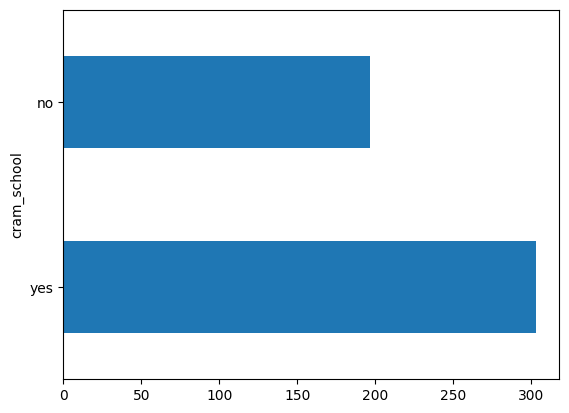

In [42]:
cat_df["cram_school"].value_counts().plot.barh();

In [43]:
cat_df["private_lesson"].value_counts() 

private_lesson
no     343
yes    157
Name: count, dtype: int64

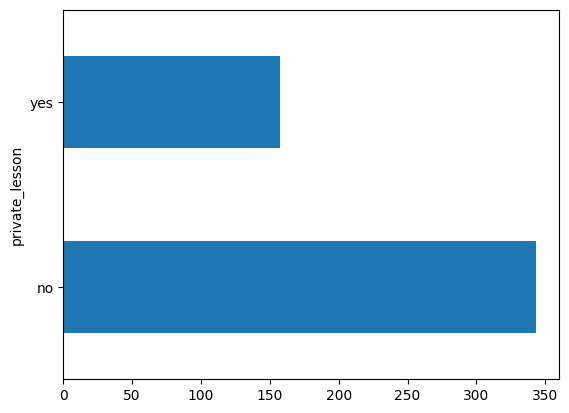

In [44]:
cat_df["private_lesson"].value_counts().plot.barh();

In [45]:
cat_df["private_room"].value_counts() 

private_room
yes    346
no     154
Name: count, dtype: int64

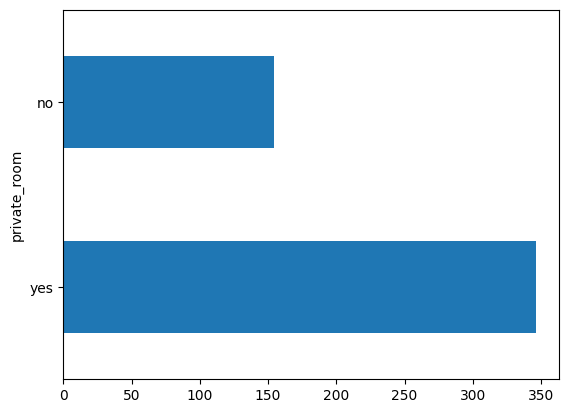

In [46]:
cat_df["private_room"].value_counts().plot.barh();

In [47]:
cat_df["study_resources"].value_counts() 

study_resources
yes    391
no     109
Name: count, dtype: int64

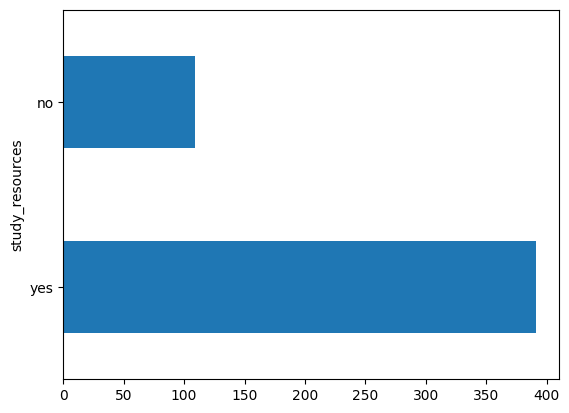

In [48]:
cat_df["study_resources"].value_counts().plot.barh();

In [49]:
cat_df["parent_edu"].value_counts() 

parent_edu
m    143
u    135
h    112
p    110
Name: count, dtype: int64

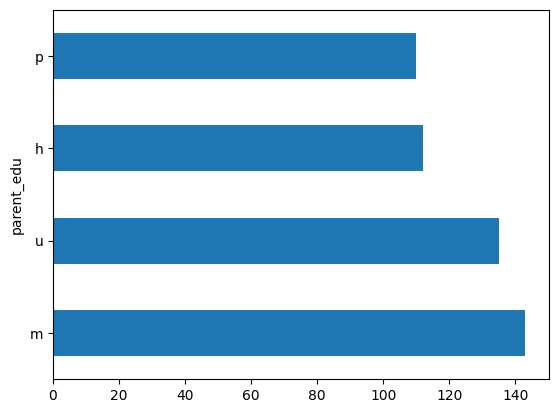

In [50]:
cat_df["parent_edu"].value_counts().plot.barh();

### Numerik Degisken Ozetleri

In [51]:
num_df = df.select_dtypes(include=["float64","int64"]) #select_dtypes --> df icerisinde istedigimiz veri tipine gore degsiken secmek icin kullanilir.
num_df.head(10) #elimizde sadece numeric degiskenler kaldi.

,gpa,avg_exam_score,absent_rate,daily_study,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
0,79.0,350,0.00,240,10,4,360.0,180,364
1,94.0,350,0.10,400,7,6,360.0,150,382
2,90.0,468,0.20,30,10,3,300.0,240,420
3,82.0,450,0.00,360,2,9,480.0,60,460
4,84.0,440,0.13,360,2,8,660.0,45,475
5,84.0,415,0.13,360,3,9,660.0,45,475
6,98.0,460,0.10,350,10,6,450.0,30,460
7,89.0,425,0.30,300,10,5,400.0,350,420
8,87.0,410,0.25,300,8,5,480.0,240,440
9,88.0,400,0.03,300,6,5,420.0,300,420


In [52]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,500.0,106.373200,88.986816,33.0,70.50,81.750000,91.00,454.0
avg_exam_score,500.0,359.690000,61.710958,90.0,315.00,364.500000,401.00,520.0
absent_rate,500.0,0.142560,0.150143,0.0,0.05,0.100000,0.18,1.0
daily_study,500.0,189.868000,114.418328,0.0,100.00,178.500000,285.75,600.0
anxiety_score,500.0,5.042000,2.465033,0.0,3.00,5.000000,7.00,10.0
motivation_score,500.0,5.750000,2.378827,0.0,4.00,6.000000,7.00,10.0
avg_sleep_time,500.0,426.650197,68.755116,60.0,390.00,426.517162,475.00,720.0
daily_social_media,500.0,117.234000,92.705317,0.0,50.00,100.000000,150.00,613.0
university_exam_score,500.0,370.088000,66.532921,141.0,327.75,380.000000,420.00,544.0


### Sutun Grafik (Bar Plot)

In [53]:
#ORDINAL TANIMLAMA
from pandas.api.types import CategoricalDtype
cat_df.parent_edu.head(10)

0    p
1    u
2    u
3    h
4    m
5    h
6    u
7    h
8    u
9    u
Name: parent_edu, dtype: category
Categories (4, object): ['h', 'm', 'p', 'u']

In [54]:
cat_df.parent_edu = cat_df.parent_edu.astype(CategoricalDtype(ordered = True))  #parent_edu degiskeninin ordinal oldugunu tanittik.

In [55]:
cat_df.parent_edu.head(1) #olsuturmus oldugu siniflarin siralamasini inceleyelim:

0    p
Name: parent_edu, dtype: category
Categories (4, object): ['h' < 'm' < 'p' < 'u']

In [56]:
#gercek siralamamiz bu muydu ?  ---> hayir ---> ['h' < 'm' < 'p' < 'u']
#eger degilse ? ---> dogru siralama islemini programa tanitmaliyiz.
#dogrusu nasildi ? ----> 'p' < 'm' < 'h' < 'u'
parent_edu_categories = ['p','m','h','u'] #kucukten buyuge girdik !

#az once donusturme yaptigimiz koda bir arguman ekleyecegiz:
cat_df.parent_edu = cat_df.parent_edu.astype(CategoricalDtype(categories = parent_edu_categories ,ordered = True))

cat_df.parent_edu.head()  #suan parent_edu verisini gorsellestirmeye hazir hale getirdik.

0    p
1    u
2    u
3    h
4    m
Name: parent_edu, dtype: category
Categories (4, object): ['p' < 'm' < 'h' < 'u']

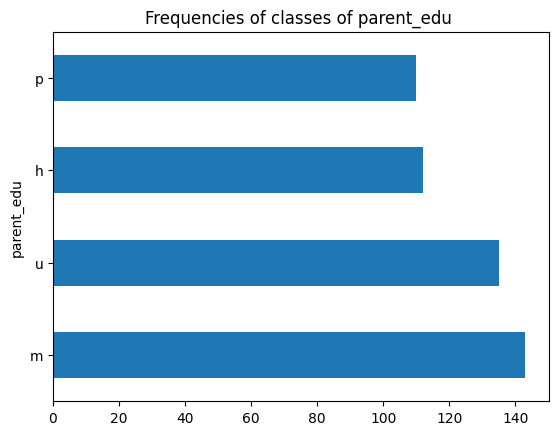

In [57]:
(  cat_df["parent_edu"]      #veri seti
 .value_counts()  #neyi gorsellestiriyoruz
 .plot.barh()     #gorsellestirme teknigi
 .set_title("Frequencies of classes of parent_edu ")  );  #title

#### Sutun Grafigi Caprazlamalar

In [58]:
df = pd.concat([cat_df, num_df], axis=1) #üzerinde işlem yapılan dataframe'ler birleştirildi
df.head()

,cram_school,private_lesson,private_room,parent_edu,study_resources,gpa,avg_exam_score,absent_rate,daily_study,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
0,no,yes,yes,p,yes,79.0,350,0.00,240,10,4,360.0,180,364
1,no,yes,yes,u,yes,94.0,350,0.10,400,7,6,360.0,150,382
2,no,no,yes,u,yes,90.0,468,0.20,30,10,3,300.0,240,420
3,no,no,yes,h,no,82.0,450,0.00,360,2,9,480.0,60,460
4,yes,no,no,m,yes,84.0,440,0.13,360,2,8,660.0,45,475


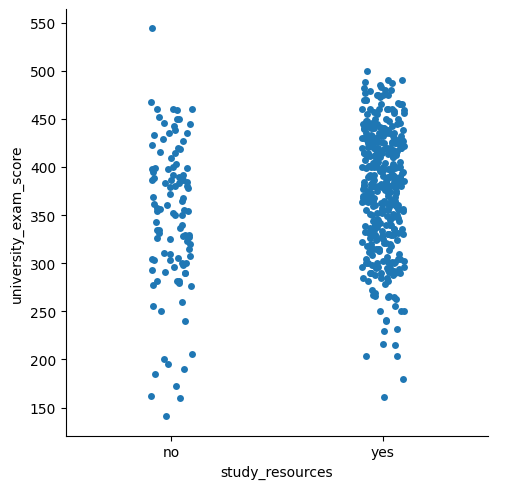

In [59]:
import seaborn as sns
sns.catplot(x = "study_resources" , y = "university_exam_score" , data = df);

In [60]:
#üniversite sınavında yüksek alan öğrenciler arasından ; bilgisayar,tablet,internet erişimi olan öğrencilerin daha yoğunluklu oldugu gözlemlendi

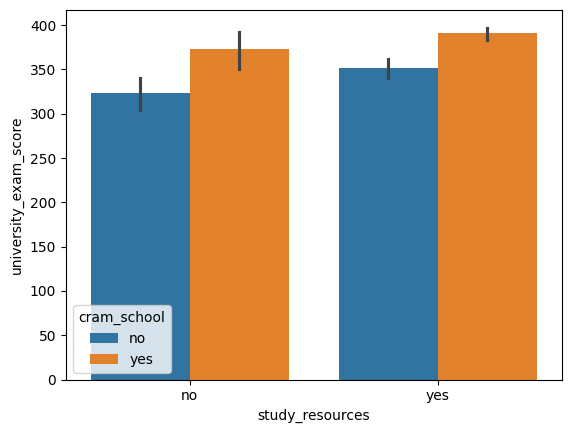

In [61]:
sns.barplot(x = "study_resources" , y = "university_exam_score" , hue = "cram_school" , data = df); #hue argumani ile bir boyut daha ekledik.

In [62]:
#dershaneye giden ve kaynak erişimi olan öğrencilerin sınavdan daha yüksek sonuç aldığı gözlemlendi

### Histogram ve Yogunluk Grafikleri

In [63]:
df["university_exam_score"].describe()

count    500.000000
mean     370.088000
std       66.532921
min      141.000000
25%      327.750000
50%      380.000000
75%      420.000000
max      544.000000
Name: university_exam_score, dtype: float64

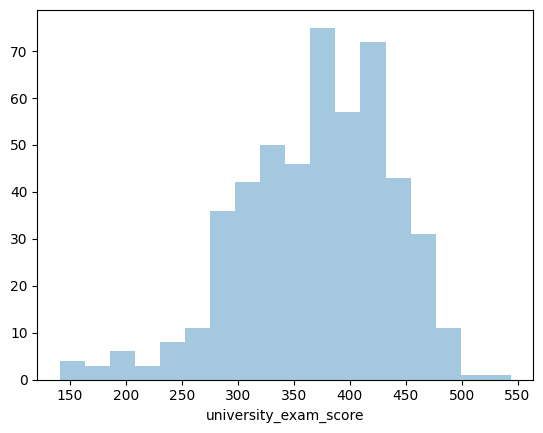

In [64]:
sns.distplot(df.university_exam_score , kde = False);
#displot() dagilim gorsellestirmek icin kullanilan bir fonksiyon
#gorsellestirmek istedigin degisken nedir ---> university_exam_score degiskeni ---> sns.distplot(df.university_exam_score)
#yogunluk fonksiyonunu da grafigin ustune konulmasini ister misin ---> hayir ---> sns.distplot(df.university_exam_score , kde = False)

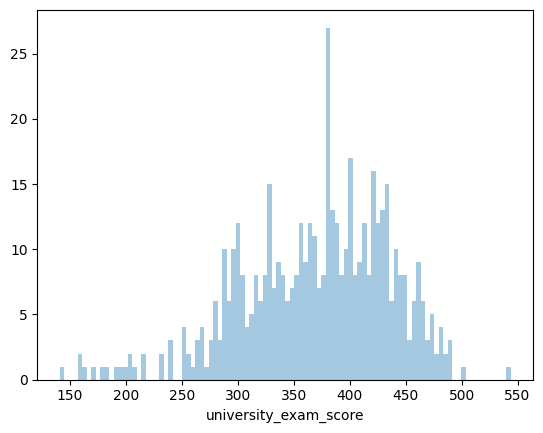

In [65]:
sns.distplot(df.university_exam_score , bins = 100 , kde = False); 

#bins degeri dustugunde kutularin genisligi artar.
#bins arttiginda detay artar ancak okuma kolayligi azalir.
#bins , histogramdaki kutucuk sayisini ifade eder.

In [66]:
#grafikte university_exam_score dağılımı incelenmektedir.

### Kutu Grafik (Box Plot)

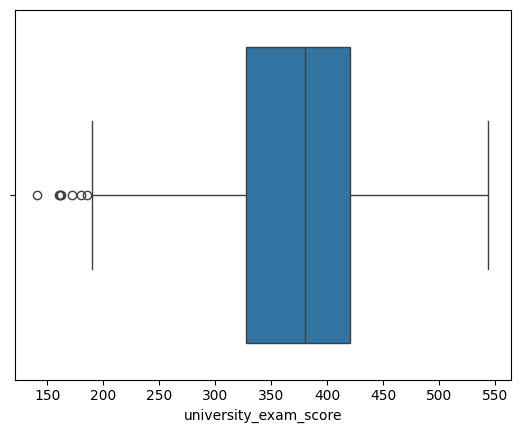

In [67]:
import seaborn as sns
sns.boxplot(x = df["university_exam_score"]); #yatay

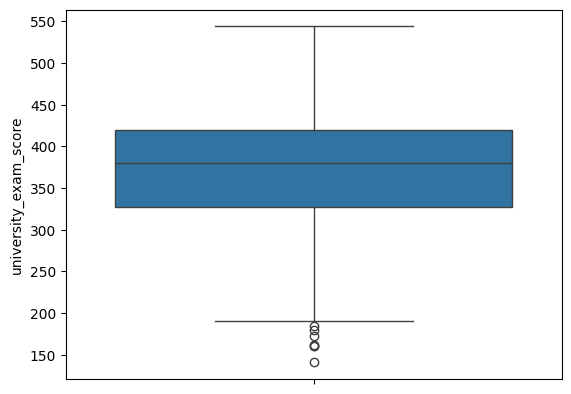

In [68]:
sns.boxplot(y = df["university_exam_score"] ); #dikey

#### Kutu Grafik Caprazlamalar

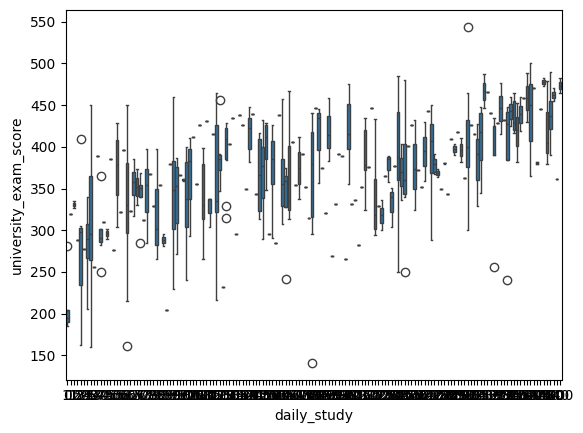

In [69]:
sns.boxplot(x ="daily_study" , y = "university_exam_score" , data = df);

In [70]:
#günlük çalışma süresinin artmasıyla ortalama oalrak daha yüksek sınav sonuçları alındığı gözlemleniyor.
#ayrıca aykırı değerler analizi için faydalı bilgiler sunuyor.

### Korelasyon Grafikleri

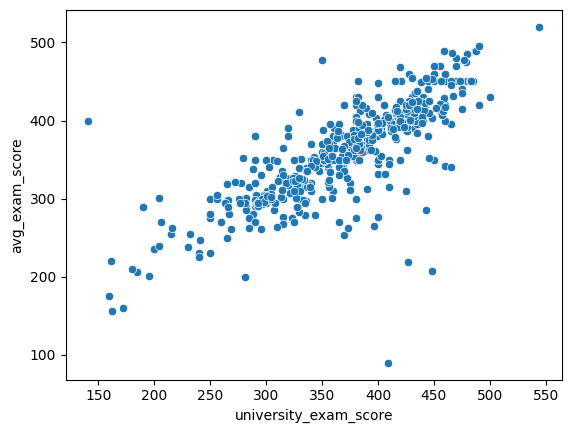

In [71]:
sns.scatterplot(x = "university_exam_score" , y = "avg_exam_score" , data = df); #scatter plot olusturmak:

In [72]:
#ortalama deneme puanı ile sınav puanı arasında pozitif korelasyon gözlemlendi

#### Korelasyon Caprazlamalar

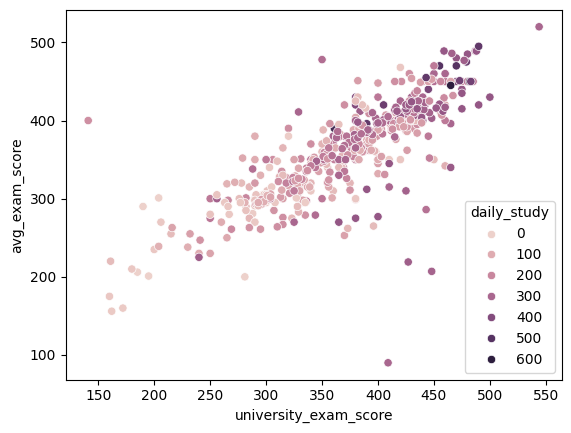

In [73]:
sns.scatterplot(x = "university_exam_score" , y = "avg_exam_score" , hue = "daily_study" , data = df);

#### Scatterplot matrisi

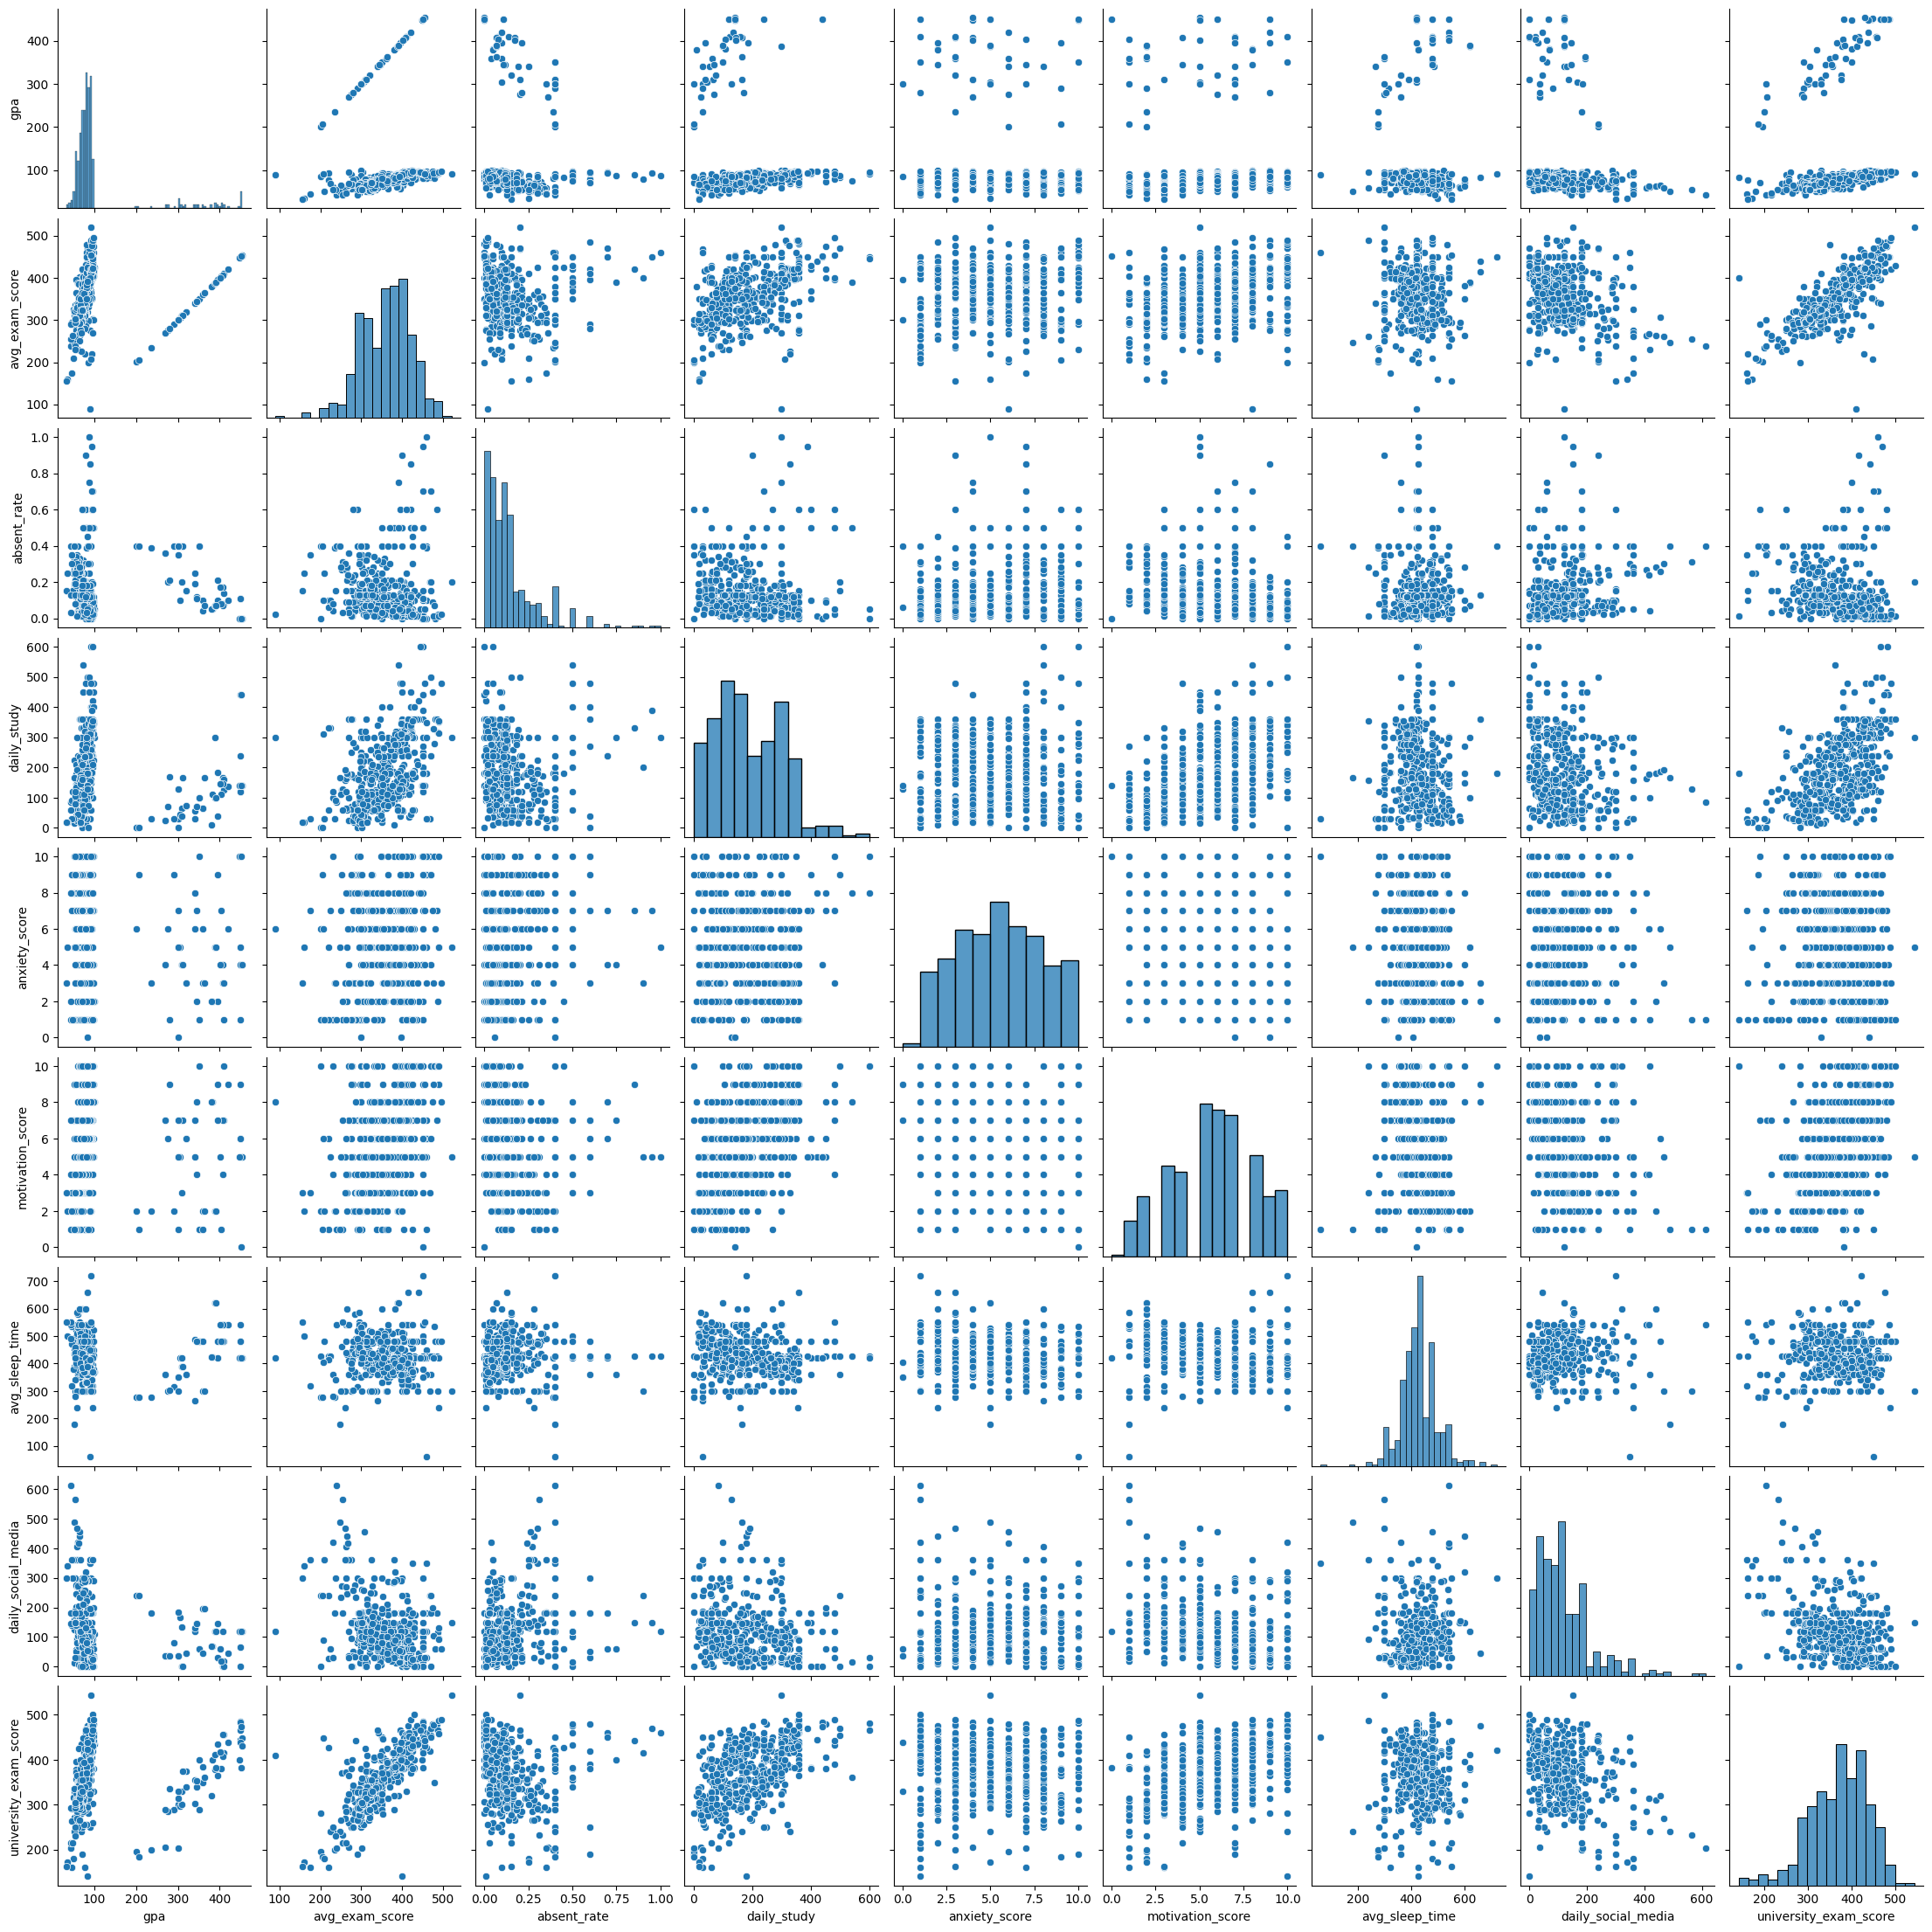

In [74]:
#scatterplot numeric degerlerin arasindaki iliskiyi ifade eden bir sacilim grafigi idi.
#verisetindeki tum numeric degiskenler icin bu iliskiyi ifade ettigimizde bir scatterplot matrixi olusturmus oluyoruz.
sns.pairplot(df)

In [75]:
#scatterplot gorsellerinde eger olusturulmus olan grafik bir toz bulutu seklindeyse veya yapisal bir formu yok ise o iki degisken arasinda bir iliski yoktur anlamina gelir.
#olusturulan scatterplot icerisindeki gozlem noktalari incelendiginde bunlar eger birbirinden farkli koselerde kumeleniyor ise , caprazlama durumundan kaynakli olan , bazi alt gruplar vardir.

# VERI ON ISLEME - EKSIK VERI ANALIZI

In [76]:
#EKSIK VERI NEDİR ? ----> incelenen veri setindeki gozlemlerde eksiklik olması durumunu ifade eder . pyhton icerisinde , ilgili veri setinde NA ,NAN veya NULL seklinde karsımıza cıkar.
#veri on isleme icin cok ciddi bir problemdir . veri girisleri , tablo birlestirme , degisken donusturme islemleri gibi islemlerde ortaya cıkabilmektedir.

#elimizdeki veride bazı eksiklikler olması durumunda bu eksiklikleri silebiliriz ya da doldurabiliriz.
#silmek istedigimizde bazı problemler ortaya cıkacaktır.
#doldurmak istedigimizde bazı problemleri cozebilecegi gibi daha buyuk problemlere de yol acabilecektir.

#EKSIK VERIYI DIREKT SILMENIN ZARARLARI

#cok degiskenli istatistiksel yontemler kitabından bir alıntı :
# "eksik degerlere sahip gozlemlerin veri setinden direkt cıkarılması ve rassalıgının incelenmemesi yapılacak istatistiksel cıkarımların , modelleme calısmalarının guvenilirligini dusurecektir" - Alpar , 2011

# "Eksik gozlemlerin veri setinden direkt cıkarılabilmesi icin veri setindeki eksikligin bazı durumlarda kısmen bazı durumlarda tamamen rastlantısal olarak olusmus olması gerekmektedir.
#  Eger eksiklikler degiskenler ile iliskili oalarak ortaya cıkan yapısal problemler ile meydana gelmis ise bu durumda yapılacak silme islemleri ciddi yanlılıklara sebek olabilecektir." - Tabachnick ve Fidell , 1996


#EKSIKLIGE NASIL YAKLASMAMIZ GEREKIR ?

#eksiklik gozlemlendiginde once bu 3 durum incelenmelidir :

# 1) Veri setindeki eksikligin yapısal bir eksiklik olup olmadıgının bilinmesi gerekir !
# bilmemiz gereken ilk sey : eksiklik rastgele mi olustu yoksa yapısal bir problemden dolayı mı olustu ?
# ornek olarak --> bir veri setinde kullanıcının kredi_kartı_harcaması verisi NA olsun . ancak kredi_kartına_sahiplik verisi de 0 (sahip degil) olsun . bu eksiklik yapısal bir eksikliktir. 
#ortalama ile doldurulması gurultu yaratır.

# 2) NA her zaman eksiklik anlamına gelmez !
# bazen bir gozlem degerinde NA olması bir eksiklik anlamına gelmez
# ornek olarak --->  kredi_kartına_sahiplik verisi de 1 (sahip) olan bir musterinin kredi_kartı_harcaması verisi NA olursa --> kredi kartı harcaması yapmaması durumu eksiklik midir?
# verisetlerinde 0 olma durumu bazen NA degerine cevrilebilir. sistem deger girilmediyse veri yok anlamında bunu yapar. bu eksiklik degildir , oraya 0 yazmak gerekir.

# 3) Bilgi Kaybı !
# ornek olarak --> kisilerin bilgilerini barındıran 100 degiskenli bir dataset dusunelim . 
# bir kisiyle alakalı 100.degisken NA olsun .
#  bu satırı silmek demek , kisiyle alakalı diger 99 bilginin de silinmesi demektir


#EKSIK VERI TURLERI NELERDIR ?

#---> eksik veri ile mucadelede en onemli asama bu eksik verinin turunun belirlenmesidir. hangi cozum veya atama yonteminin secilecegi buna baglıdır !
#---> 1976 yılında Robin adında bir veri bilimci bu turleri formulize etmistir.

# 1) Tumuyle Rastlantısal Kayıp ------> diger degiskenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele olusan gozlemlerdir. direkt silinebilir.
# 2) Rastlantısal Kayıp ------> diger degiskenlere baglı olarak olusabilen eksiklik turudur
# 3) Rastlantısal Olmayan Kayıp -------> goz ardı edilemeyecek olan ve yapısal problemler ile ortaya cıkan eksiklik turudur.

#EKSIK VERI RASSALLIGININ TESTI
#silmek ya da doldurmak islemleri ancak rassallıgın incelenmesi sonucu yapılabilir.rassallıgı incelemek icin kullanılan teknikler :

#------> Gorsel Teknikler
#------> Bagımsız iki orneklem T testi
#------> Korelasyon testi
#------> Little'nin MCAR testi

#biz en cok Gorsel Teknikler ve Little'nin MCAR testi yontemlerini kullanacagız.

#EKSIK VERI PROBLEMI NASIL GIDERILIR ?

# "The idea of imputation is both seductive and dangerous" - R.J.A Little & D.B. Rubin

#YONTEMLER :

# 1) Silme Yontemleri
#-----> gozlem ya da degisken silme yontemi
#-----> liste bazında silme yontemi (Listwise Method)
#-----> ciftler bazında silme yontemi (Pairwise Method)

# 2) Deger Atama Yontemleri
#-----> Ortanca , ortalama , medyan
#-----> en benzer birime atama (hot deck)
#-----> dıs kaynaklı atama

# 3) Tahmine Dayalı Yontemler (ileri seviye yontemler)
#-----> Machine Learning
#-----> EM
#-----> Coklu atama yontemi

In [77]:
import pandas as pd

students = pd.read_excel("./students.xlsx")
df = students.copy()

df.cram_school = pd.Categorical(df.cram_school)
df.private_lesson = pd.Categorical(df.private_lesson)
df.private_room = pd.Categorical(df.private_room)
df.parent_edu = pd.Categorical(df.parent_edu)
df.study_resources = pd.Categorical(df.study_resources)

# "yes " şeklindeki değişken bir hata , düzeltelim :
df['cram_school'] = df['cram_school'].astype(str).str.strip() #str.strip() Bu fonksiyon her bir gözlemdeki yazının başında ve sonunda varsa boşluk karakterlerini (space, tab vb.) siler.
df['cram_school'] = df['cram_school'].astype('category')

# "no " şeklindeki değişken bir hata , düzeltelim :
df['private_lesson'] = df['private_lesson'].astype(str).str.strip() 
df['private_lesson'] = df['private_lesson'].astype('category')

# "p " , "u " , "m " şeklindeki değişkenler bir hata , düzeltelim :
df['parent_edu'] = df['parent_edu'].astype(str).str.strip() 
df['parent_edu'] = df['parent_edu'].astype('category')

#ORDINAL TANIMLAMA
from pandas.api.types import CategoricalDtype
parent_edu_categories = ['p','m','h','u'] #kucukten buyuge girdik !
cat_df.parent_edu = cat_df.parent_edu.astype(CategoricalDtype(categories = parent_edu_categories ,ordered = True))  #parent_edu degiskeninin ordinal oldugunu tanittik.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gpa                    501 non-null    float64 
 1   avg_exam_score         501 non-null    int64   
 2   absent_rate            501 non-null    float64 
 3   daily_study            501 non-null    int64   
 4   cram_school            501 non-null    category
 5   private_lesson         501 non-null    category
 6   private_room           501 non-null    category
 7   parent_edu             501 non-null    category
 8   study_resources        501 non-null    category
 9   anxiety_score          501 non-null    int64   
 10  motivation_score       501 non-null    int64   
 11  avg_sleep_time         437 non-null    float64 
 12  daily_social_media     501 non-null    int64   
 13  university_exam_score  501 non-null    int64   
dtypes: category(5), float64(3), int64(6)
memor

In [79]:
df.isnull().values.any() #veri setinde hic eksik gozlem var mi?

np.True_

In [80]:
df.isnull().sum() #hangi degiskende kacar tane eksik(aykiri) gozlem(deger) var?

gpa                       0
avg_exam_score            0
absent_rate               0
daily_study               0
cram_school               0
private_lesson            0
private_room              0
parent_edu                0
study_resources           0
anxiety_score             0
motivation_score          0
avg_sleep_time           64
daily_social_media        0
university_exam_score     0
dtype: int64

### Eksik Veri Yapısının Görselleştirilmesi

In [81]:
#bunun icin missingno isimli bir kutuphane indirmeliyiz : 
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\sogut\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [82]:
import missingno as msno

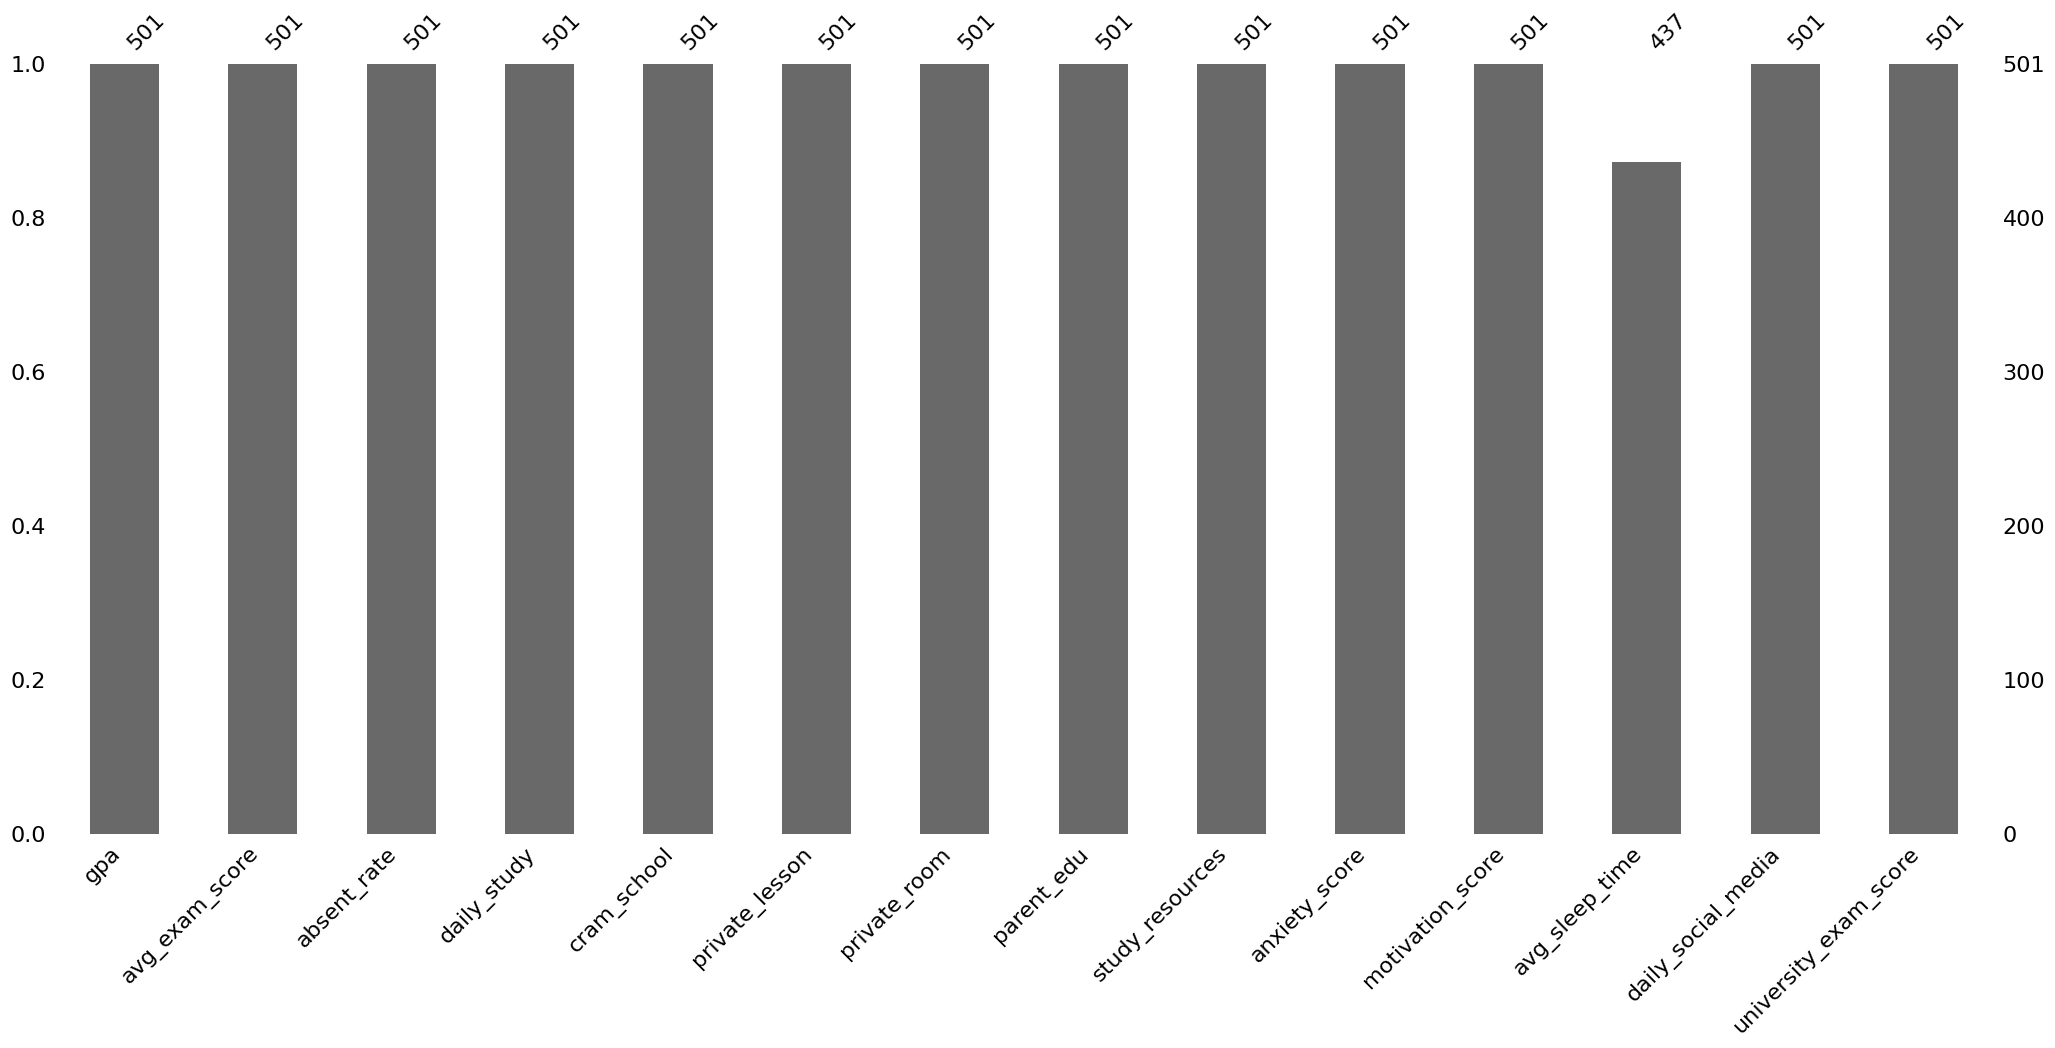

In [83]:
msno.bar(df);  #verisetindeki eksik ve eksik olmayan verilerin gorsellestirilmesi icin kullanılan bir yontem

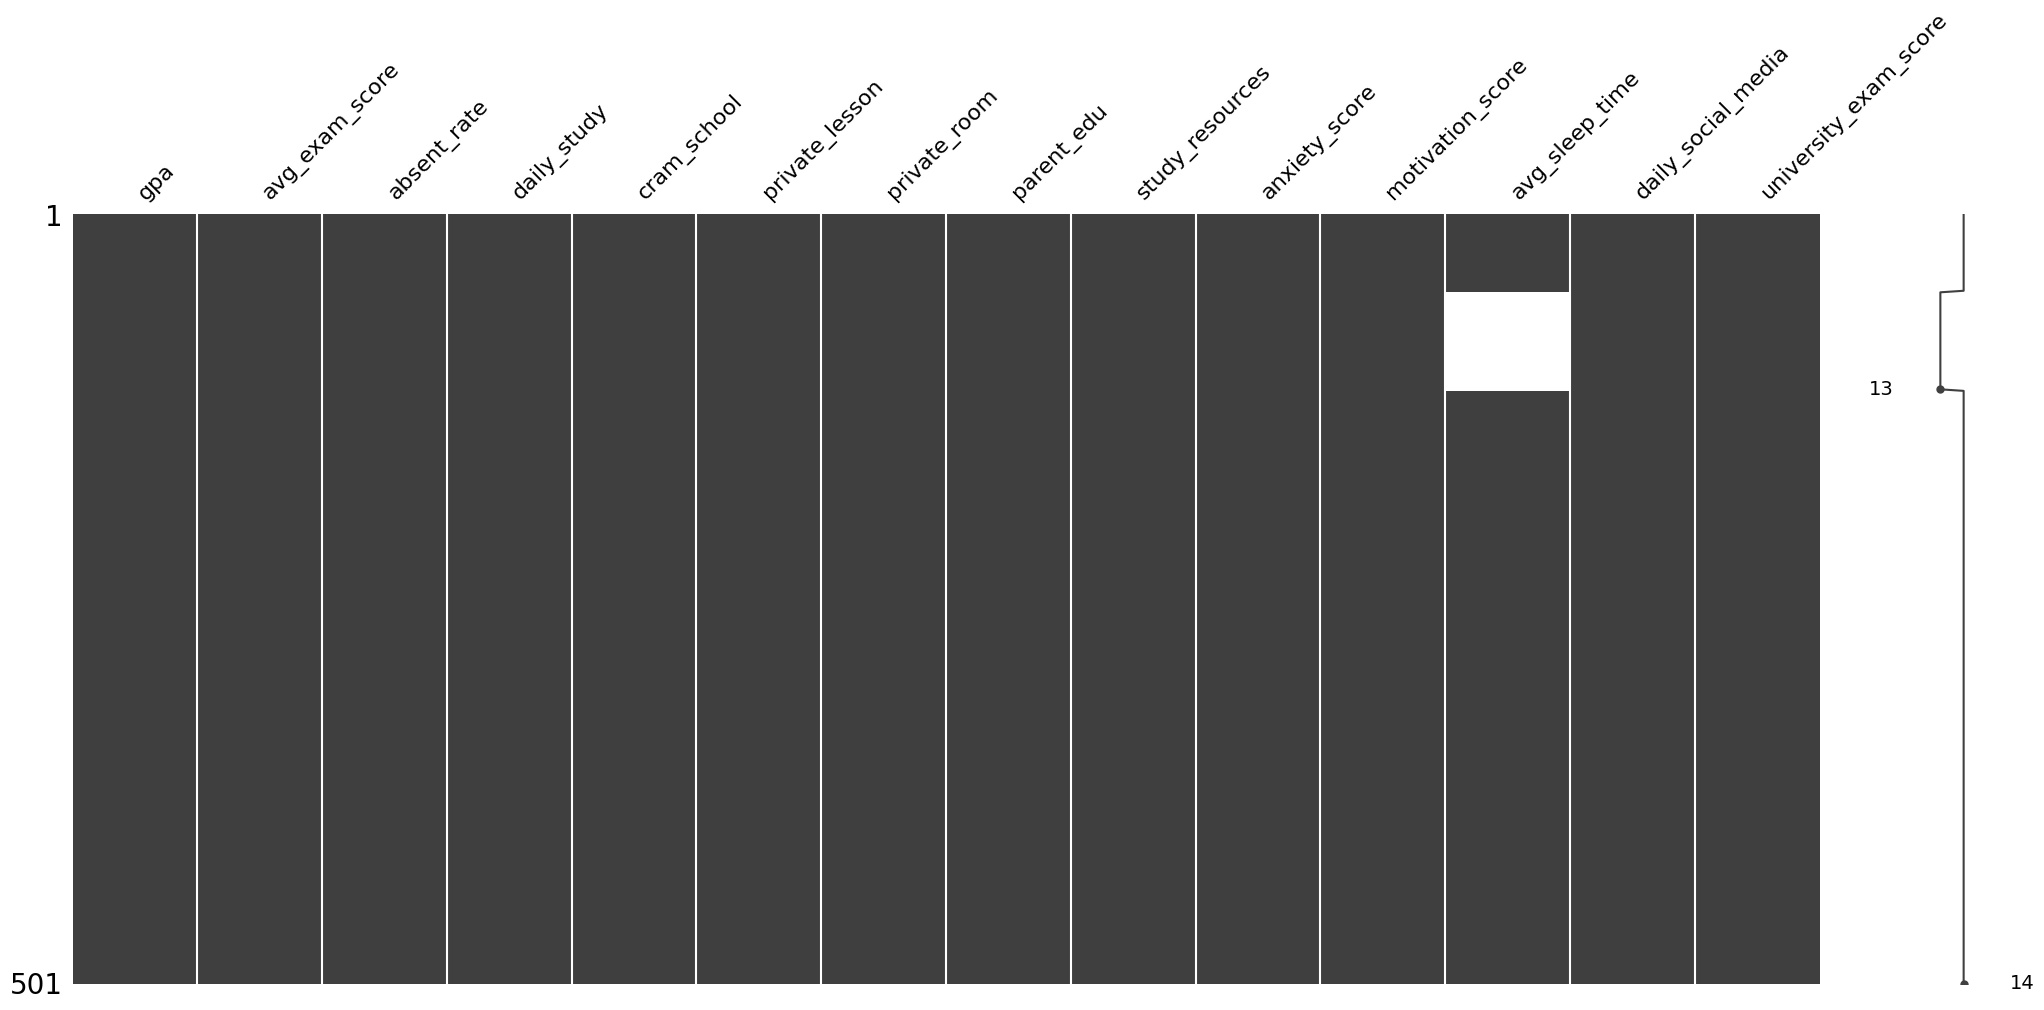

In [84]:
msno.matrix(df); #eksik degerlerin rassallıgı ile ilgili gerekli yapısal bozuklukları yakalamak icin kullanılan bir yontem

In [85]:
#avg_sleep_degiskeninin eksiklik durumu gozlemlendi . bu bariz yapısal bir eksiklik bulgusu bulunmadı. bir bagımlılık durumu söz konusu değil.
#eksik verinin ortalama ile doldurulmasında bir sakınca gozukmemektedir.

In [86]:

#  1) ------------> sayısal değişkenlerde atama :

#tablo genelinde tüm eksikliklere atama :

# 1.yol - Kategorik değişkenler için hata veriyor
# Sadece sayısal sütunları seçerek uygulayalım
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

# 2.yol - Kategorik değişkenler için hata veriyor
# Sadece sayısal sütunlar için ortalama ile doldurma
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3.yol - Kategorik değişkenler için hata veriyor
# Sadece sayısal sütunlar için where kullanımı
df[numeric_cols] = df[numeric_cols].where(pd.notna(df[numeric_cols]), df[numeric_cols].mean(), axis="columns")

# Özellikle avg_sleep_time için ortalama ile doldurma
df["avg_sleep_time"].fillna(df["avg_sleep_time"].mean(), inplace=True)

### Sayısal degiskenlere deger atama 

In [87]:
#2
df["avg_sleep_time"].fillna(df.avg_sleep_time.mean(),inplace=True)

In [88]:
df.isnull().values.any() #veri setinde hic eksik gozlem var mi?

np.False_

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gpa                    501 non-null    float64 
 1   avg_exam_score         501 non-null    int64   
 2   absent_rate            501 non-null    float64 
 3   daily_study            501 non-null    int64   
 4   cram_school            501 non-null    category
 5   private_lesson         501 non-null    category
 6   private_room           501 non-null    category
 7   parent_edu             501 non-null    category
 8   study_resources        501 non-null    category
 9   anxiety_score          501 non-null    int64   
 10  motivation_score       501 non-null    int64   
 11  avg_sleep_time         501 non-null    float64 
 12  daily_social_media     501 non-null    int64   
 13  university_exam_score  501 non-null    int64   
dtypes: category(5), float64(3), int64(6)
memor

# VERI ON ISLEME - AYRIK VERI ANALIZI

#### Onceki yaptıgımız islemleri kısaca tekrarlayalım : 

In [90]:
import pandas as pd
import numpy as np 
import seaborn as sns

students = pd.read_excel("./students.xlsx")
df = students.copy()

df.cram_school = pd.Categorical(df.cram_school)
df.private_lesson = pd.Categorical(df.private_lesson)
df.private_room = pd.Categorical(df.private_room)
df.parent_edu = pd.Categorical(df.parent_edu)
df.study_resources = pd.Categorical(df.study_resources)

# "yes " şeklindeki değişken bir hata , düzeltelim :
df['cram_school'] = df['cram_school'].astype(str).str.strip() #str.strip() Bu fonksiyon her bir gözlemdeki yazının başında ve sonunda varsa boşluk karakterlerini (space, tab vb.) siler.
df['cram_school'] = df['cram_school'].astype('category')

# "no " şeklindeki değişken bir hata , düzeltelim :
df['private_lesson'] = df['private_lesson'].astype(str).str.strip() 
df['private_lesson'] = df['private_lesson'].astype('category')

# "p " , "u " , "m " şeklindeki değişkenler bir hata , düzeltelim :
df['parent_edu'] = df['parent_edu'].astype(str).str.strip() 
df['parent_edu'] = df['parent_edu'].astype('category')

#ORDINAL TANIMLAMA
from pandas.api.types import CategoricalDtype
parent_edu_categories = ['p','m','h','u'] #kucukten buyuge girdik !
cat_df.parent_edu = cat_df.parent_edu.astype(CategoricalDtype(categories = parent_edu_categories ,ordered = True))  #parent_edu degiskeninin ordinal oldugunu tanittik.

df["avg_sleep_time"].fillna(df.avg_sleep_time.mean(),inplace=True)

df.isnull().values.any() #veri setinde hic eksik gozlem var mi?

np.False_

In [91]:
df.head()

,gpa,avg_exam_score,absent_rate,daily_study,cram_school,private_lesson,private_room,parent_edu,study_resources,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
0,79.0,350,0.00,240,no,yes,yes,p,yes,10,4,360.0,180,364
1,94.0,350,0.10,400,no,yes,yes,u,yes,7,6,360.0,150,382
2,90.0,468,0.20,30,no,no,yes,u,yes,10,3,300.0,240,420
3,82.0,450,0.00,360,no,no,yes,h,no,2,9,480.0,60,460
4,84.0,440,0.13,360,yes,no,no,m,yes,2,8,660.0,45,475


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gpa                    501 non-null    float64 
 1   avg_exam_score         501 non-null    int64   
 2   absent_rate            501 non-null    float64 
 3   daily_study            501 non-null    int64   
 4   cram_school            501 non-null    category
 5   private_lesson         501 non-null    category
 6   private_room           501 non-null    category
 7   parent_edu             501 non-null    category
 8   study_resources        501 non-null    category
 9   anxiety_score          501 non-null    int64   
 10  motivation_score       501 non-null    int64   
 11  avg_sleep_time         501 non-null    float64 
 12  daily_social_media     501 non-null    int64   
 13  university_exam_score  501 non-null    int64   
dtypes: category(5), float64(3), int64(6)
memor

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,501.0,106.344711,88.900072,33.0,70.50,81.800000,91.00,454.0
avg_exam_score,501.0,359.810379,61.708071,90.0,315.00,365.000000,401.00,520.0
absent_rate,501.0,0.142335,0.150077,0.0,0.05,0.100000,0.18,1.0
daily_study,501.0,189.858283,114.304059,0.0,100.00,179.000000,285.00,600.0
anxiety_score,501.0,5.043912,2.462939,0.0,3.00,5.000000,7.00,10.0
motivation_score,501.0,5.752495,2.377103,0.0,4.00,6.000000,7.00,10.0
avg_sleep_time,501.0,426.517162,68.750842,60.0,390.00,426.517162,475.00,720.0
daily_social_media,501.0,117.039920,92.714392,0.0,50.00,100.000000,150.00,613.0
university_exam_score,501.0,370.169661,66.491482,141.0,328.00,380.000000,420.00,544.0


#### Aykırı Gözlem

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import stats

num_df = df.select_dtypes(include=["float64","int64"])
num_df.head()

,gpa,avg_exam_score,absent_rate,daily_study,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
0,79.0,350,0.00,240,10,4,360.0,180,364
1,94.0,350,0.10,400,7,6,360.0,150,382
2,90.0,468,0.20,30,10,3,300.0,240,420
3,82.0,450,0.00,360,2,9,480.0,60,460
4,84.0,440,0.13,360,2,8,660.0,45,475


In [95]:
from sklearn.neighbors import LocalOutlierFactor

#skorlama islemi gerceklestirelim :
clf = LocalOutlierFactor(n_neighbors = 20 , contamination = 0.1)

#LocalOutlierFactor (LOF), aykırı değerleri tespit etmek için kullanılan bir anomali algılama algoritmasıdır.
#n_neighbors=20: Her veri noktasının yakınındaki 20 komşusuna bakarak aykırılığı belirler.
#contamination=0.1: Verinin %10'unun aykırı (outlier) olduğunu varsayar..8yogunlugu ifade eder)

In [96]:
#Modele Veri Setini Öğretme ve Aykırılık Skorlarını Alma:
clf.fit_predict(num_df)
#fit_predict(df) ile , LOF veri setini kullanarak öğrenme işlemini yapar.
#Her veri noktasına bir negatif aykırılık faktörü (Negative Outlier Factor - NOF) atar.
#Sonuç olarak, her satırın bir aykırılık skoru olur.

array([ 1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [97]:
scores = clf.negative_outlier_factor_
#negative_outlier_factor_, her veri noktasının aykırılık skorlarını içeren bir NumPy dizisidir.
#Bu skorlar negatif değerlerdir ve değer ne kadar küçükse, veri noktası o kadar aykırıdır.

In [98]:
type(scores)

numpy.ndarray

In [99]:
np.sort(scores)

array([-3.05183196, -2.5570336 , -2.17488388, -2.17476873, -2.16407781,
       -2.11763323, -2.08256217, -1.9405387 , -1.90707514, -1.89925022,
       -1.84172491, -1.83439157, -1.83269327, -1.79519807, -1.79508236,
       -1.75658102, -1.74899735, -1.70511099, -1.68755707, -1.68663054,
       -1.68514548, -1.66554826, -1.65874936, -1.63476749, -1.63308544,
       -1.63278499, -1.61849997, -1.60973314, -1.59323611, -1.56974015,
       -1.56369183, -1.55835356, -1.55275571, -1.55026717, -1.54313419,
       -1.5356027 , -1.51975811, -1.5173193 , -1.51063635, -1.50380772,
       -1.50089596, -1.49833516, -1.48188078, -1.48164358, -1.4814785 ,
       -1.4783805 , -1.46551224, -1.46509085, -1.45689193, -1.4498096 ,
       -1.44247119, -1.44097904, -1.43603841, -1.43511255, -1.43265835,
       -1.42588089, -1.4250349 , -1.41495403, -1.41253701, -1.41136361,
       -1.40741149, -1.40736853, -1.40640796, -1.40560501, -1.40551382,
       -1.40169726, -1.40134058, -1.39703463, -1.39156156, -1.39

In [100]:
np.sort(scores)[40]

np.float64(-1.5008959568867468)

In [101]:
#Aykırılık İçin Eşik Değer Belirleme:
esik_deger = np.sort(scores)[40] 
#np.sort(scores): Bütün aykırılık skorlarını sıralar.
#[40]: En küçük 41. skoru eşik değer olarak alıyor.

In [102]:
#Aykırı Olmayanları Filtreleme:
aykiri_truefalse = scores > esik_deger
#scores > esik_deger ifadesi, her bir veri noktasının aykırılık skorunu belirlenen eşik ile karşılaştırır.
#Eşik değerinden büyük olanlar normal kabul edilir (True), küçük olanlar aykırı olarak işaretlenir (False).
#Sonuç olarak, bir boolean dizi (True/False) elde edilir.

In [103]:
#Aykırı Değerleri Çıkartıp Yeni Veri Seti Oluşturma: -------> biz bu yolu tercih etmiyoruz , o yüzden sadece gösterim için uygulama yapıldı.
df_new = df[aykiri_truefalse]
#Bu satır, sadece aykırı olmayan (True olan) satırları seçerek yeni bir dataframe oluşturur.
#Aykırılar atılmış olur ve temizlenmiş bir df_new veri seti elde edilir.

In [104]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 500
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gpa                    460 non-null    float64 
 1   avg_exam_score         460 non-null    int64   
 2   absent_rate            460 non-null    float64 
 3   daily_study            460 non-null    int64   
 4   cram_school            460 non-null    category
 5   private_lesson         460 non-null    category
 6   private_room           460 non-null    category
 7   parent_edu             460 non-null    category
 8   study_resources        460 non-null    category
 9   anxiety_score          460 non-null    int64   
 10  motivation_score       460 non-null    int64   
 11  avg_sleep_time         460 non-null    float64 
 12  daily_social_media     460 non-null    int64   
 13  university_exam_score  460 non-null    int64   
dtypes: category(5), float64(3), int64(6)
memory usa

In [105]:
df[~aykiri_truefalse] #aykırı gozlemler

,gpa,avg_exam_score,absent_rate,daily_study,cram_school,private_lesson,private_room,parent_edu,study_resources,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
1,94.0,350,0.10,400,no,yes,yes,u,yes,7,6,360.000000,150,382
2,90.0,468,0.20,30,no,no,yes,u,yes,10,3,300.000000,240,420
4,84.0,440,0.13,360,yes,no,no,m,yes,2,8,660.000000,45,475
5,84.0,415,0.13,360,yes,no,no,h,yes,3,9,660.000000,45,475
7,89.0,425,0.30,300,yes,no,no,h,yes,10,5,400.000000,350,420
11,89.0,460,0.40,30,yes,no,yes,p,no,10,1,60.000000,350,450
12,84.0,470,0.20,500,yes,yes,yes,u,yes,9,10,360.000000,240,455
15,89.0,90,0.02,300,yes,yes,yes,u,yes,6,8,420.000000,120,409
18,92.0,520,0.20,300,yes,no,no,p,no,5,5,300.000000,150,544
23,77.0,338,0.12,270,no,yes,no,p,yes,2,1,300.000000,90,288


### Baskılama

In [106]:
#TEK DEGISKENLI AYKIRI GOZLEM 
#boxplot(IQR) yontemi ile alt sınır ve ust sınır belirlendi ve 3 yaklasım ele alındı. belirlenen bu sınırlar kullanılarak :
# 1) SILINDI ----> bu sınırların altında ve ustunde kalan ayrık degerler silindi.
# 2) ORTALAMA ILE DOLDURULDU ---> bu sınırların altında ve ustunde kalan ayrık degerler yerine ortalama atandı.
# 3) BASKILANDI ---->  bu sınırların altında ve ustunde kalan ayrık degerler yerine sınır degerleri bastırıldı.

#COK DEGISKENLI AYKIRI GOZLEM
#onceki derste aykırı degerleri LOF algoritmasıyla tespit ettik.
# 1) tespit edilen bu degerleri dataframe icerisinden kaldırmayı gorduk.
# 2) anlatılmayacak ama istersek aynı algoritmayı kullanarak tespit edilen ayrık degerler yerine ortalamayı atayabiliriz.
# 3) BASKILAMA uygulayabiliriz :

In [107]:
num_df = df.select_dtypes(include=["float64","int64"])

#LOF algoritması calısması :
clf = LocalOutlierFactor(n_neighbors = 20 , contamination = 0.1)
clf.fit_predict(num_df)
scores = clf.negative_outlier_factor_
esik_deger = np.sort(scores)[40]
aykiri_truefalse = scores > esik_deger

#belirledigimiz esik degere karsılık gelen gozlemi isimlendirelim ve kaydedelim:
baski_deger = num_df[scores == esik_deger]

#aykiri degerleri isimlendirip kaydedelim :
aykirilar = num_df[~aykiri_truefalse] #aykırı gozlemler
aykirilar

,gpa,avg_exam_score,absent_rate,daily_study,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
1,94.0,350,0.10,400,7,6,360.000000,150,382
2,90.0,468,0.20,30,10,3,300.000000,240,420
4,84.0,440,0.13,360,2,8,660.000000,45,475
5,84.0,415,0.13,360,3,9,660.000000,45,475
7,89.0,425,0.30,300,10,5,400.000000,350,420
11,89.0,460,0.40,30,10,1,60.000000,350,450
12,84.0,470,0.20,500,9,10,360.000000,240,455
15,89.0,90,0.02,300,6,8,420.000000,120,409
18,92.0,520,0.20,300,5,5,300.000000,150,544
23,77.0,338,0.12,270,2,1,300.000000,90,288


In [108]:
aykirilar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1 to 442
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gpa                    41 non-null     float64
 1   avg_exam_score         41 non-null     int64  
 2   absent_rate            41 non-null     float64
 3   daily_study            41 non-null     int64  
 4   anxiety_score          41 non-null     int64  
 5   motivation_score       41 non-null     int64  
 6   avg_sleep_time         41 non-null     float64
 7   daily_social_media     41 non-null     int64  
 8   university_exam_score  41 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 3.2 KB


In [109]:
#dataframe'i indexsiz bir arraye cevirmek
aykirilar.to_records(index=False) #indexsiz bir arraye cevirmek

rec.array([( 94. , 350, 0.1 , 400,  7,  6, 360.        , 150, 382),
           ( 90. , 468, 0.2 ,  30, 10,  3, 300.        , 240, 420),
           ( 84. , 440, 0.13, 360,  2,  8, 660.        ,  45, 475),
           ( 84. , 415, 0.13, 360,  3,  9, 660.        ,  45, 475),
           ( 89. , 425, 0.3 , 300, 10,  5, 400.        , 350, 420),
           ( 89. , 460, 0.4 ,  30, 10,  1,  60.        , 350, 450),
           ( 84. , 470, 0.2 , 500,  9, 10, 360.        , 240, 455),
           ( 89. ,  90, 0.02, 300,  6,  8, 420.        , 120, 409),
           ( 92. , 520, 0.2 , 300,  5,  5, 300.        , 150, 544),
           ( 77. , 338, 0.12, 270,  2,  1, 300.        ,  90, 288),
           ( 80. , 400, 0.9 , 200,  3,  5, 300.        , 240, 415),
           ( 91. , 450, 0.4 , 180,  1, 10, 720.        , 300, 421),
           ( 77. , 220, 0.1 ,  60,  1,  1, 426.51716247, 240, 161),
           ( 92. , 450, 0.  , 600, 10, 10, 426.51716247,   0, 482),
           ( 86. , 200, 0.  ,   0,  1, 10, 426.5

In [110]:
aykirilar_indexsiz = aykirilar.to_records(index=False) #1
aykirilar_indexsiz[:] = baski_deger.to_records(index=False) #2&3

In [111]:
#simdi elimizde baska bir problem var : orjinal df icindeki yapı bundan farklı , nasıl atama islemi yapılacak?
df[~aykiri_truefalse]

,gpa,avg_exam_score,absent_rate,daily_study,cram_school,private_lesson,private_room,parent_edu,study_resources,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
1,94.0,350,0.10,400,no,yes,yes,u,yes,7,6,360.000000,150,382
2,90.0,468,0.20,30,no,no,yes,u,yes,10,3,300.000000,240,420
4,84.0,440,0.13,360,yes,no,no,m,yes,2,8,660.000000,45,475
5,84.0,415,0.13,360,yes,no,no,h,yes,3,9,660.000000,45,475
7,89.0,425,0.30,300,yes,no,no,h,yes,10,5,400.000000,350,420
11,89.0,460,0.40,30,yes,no,yes,p,no,10,1,60.000000,350,450
12,84.0,470,0.20,500,yes,yes,yes,u,yes,9,10,360.000000,240,455
15,89.0,90,0.02,300,yes,yes,yes,u,yes,6,8,420.000000,120,409
18,92.0,520,0.20,300,yes,no,no,p,no,5,5,300.000000,150,544
23,77.0,338,0.12,270,no,yes,no,p,yes,2,1,300.000000,90,288


In [112]:
num_df[~aykiri_truefalse] = pd.DataFrame(aykirilar_indexsiz , index = df[~aykiri_truefalse].index)
num_df[~aykiri_truefalse] #aykırı degerlere esik degere karsılık gelen gozlemin verileri kopyalandı

,gpa,avg_exam_score,absent_rate,daily_study,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
1,89.0,425,0.3,300,10,5,400.0,350,420
2,89.0,425,0.3,300,10,5,400.0,350,420
4,89.0,425,0.3,300,10,5,400.0,350,420
5,89.0,425,0.3,300,10,5,400.0,350,420
7,89.0,425,0.3,300,10,5,400.0,350,420
11,89.0,425,0.3,300,10,5,400.0,350,420
12,89.0,425,0.3,300,10,5,400.0,350,420
15,89.0,425,0.3,300,10,5,400.0,350,420
18,89.0,425,0.3,300,10,5,400.0,350,420
23,89.0,425,0.3,300,10,5,400.0,350,420


In [113]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gpa                    501 non-null    float64
 1   avg_exam_score         501 non-null    int64  
 2   absent_rate            501 non-null    float64
 3   daily_study            501 non-null    int64  
 4   anxiety_score          501 non-null    int64  
 5   motivation_score       501 non-null    int64  
 6   avg_sleep_time         501 non-null    float64
 7   daily_social_media     501 non-null    int64  
 8   university_exam_score  501 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 35.4 KB


In [114]:
#sadece sayısal degiskenler uzerinde yaptıgımız degisiklikleri , kategorik degiskenler ile birlestirerek df'in orjinal yapısı korundu(aykırı degerler baskılandı)
cat_df = df.select_dtypes(include=["category"])
df = pd.concat([cat_df, num_df], axis=1)

# VERI ON ISLEME - DEGISKEN DONUSUMLERI

### projenin bu kısmına kadar yaptıgımız her işlemi yalın şekilde tekrarlıyoruz :

In [115]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy.stats import stats
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

students = pd.read_excel("./students.xlsx")
df = students.copy()

df.cram_school = pd.Categorical(df.cram_school)
df.private_lesson = pd.Categorical(df.private_lesson)
df.private_room = pd.Categorical(df.private_room)
df.parent_edu = pd.Categorical(df.parent_edu)
df.study_resources = pd.Categorical(df.study_resources)

# "yes " şeklindeki değişken bir hata , düzeltelim :
df['cram_school'] = df['cram_school'].astype(str).str.strip() #str.strip() Bu fonksiyon her bir gözlemdeki yazının başında ve sonunda varsa boşluk karakterlerini (space, tab vb.) siler.
df['cram_school'] = df['cram_school'].astype('category')

# "no " şeklindeki değişken bir hata , düzeltelim :
df['private_lesson'] = df['private_lesson'].astype(str).str.strip() 
df['private_lesson'] = df['private_lesson'].astype('category')

# "p " , "u " , "m " şeklindeki değişkenler bir hata , düzeltelim :
df['parent_edu'] = df['parent_edu'].astype(str).str.strip() 
df['parent_edu'] = df['parent_edu'].astype('category')

#ORDINAL TANIMLAMA
from pandas.api.types import CategoricalDtype
parent_edu_categories = ['p','m','h','u'] #kucukten buyuge girdik !
df.parent_edu = df.parent_edu.astype(CategoricalDtype(categories = parent_edu_categories ,ordered = True))  #parent_edu degiskeninin ordinal oldugunu tanittik.

df["avg_sleep_time"].fillna(df.avg_sleep_time.mean(),inplace=True) #eksik degerlerin rassallıgı ve raslantısallıgı incelenip dolduruldu.
df["private_lesson"] = df["private_lesson"].replace("nan", np.nan)
df.dropna(inplace = True) #eksik degerlerin direkt silinmesi - 1 adet eksik kategorik değişkeni silmek için

#AYKIRI DEGERLER BASKILAMA
num_df = df.select_dtypes(include=["float64","int64"])

#LOF algoritması calısması :
clf = LocalOutlierFactor(n_neighbors = 20 , contamination = 0.1)
clf.fit_predict(num_df)
scores = clf.negative_outlier_factor_
esik_deger = np.sort(scores)[40]
aykiri_truefalse = scores > esik_deger

#belirledigimiz esik degere karsılık gelen gozlemi isimlendirelim ve kaydedelim:
baski_deger = num_df[scores == esik_deger]

#aykiri degerleri isimlendirip kaydedelim :
aykirilar = num_df[~aykiri_truefalse] #aykırı gozlemler

#elimizdeki aykiri degerler , esik degere karsılık gelen gozlem birimini atarken , index problemleri meydana geliyor.
#bu problemi cozecek operasyonları gerceklestirelim:

#dataframe'i indexsiz bir arraye cevirmek
aykirilar.to_records(index=False) #indexsiz bir arraye cevirmek

aykirilar_indexsiz = aykirilar.to_records(index=False) #aykirilar dataframe'ini indexsiz bir arraye cevirdik
aykirilar_indexsiz[:] = baski_deger.to_records(index=False) #baskı_deger'ini de arraylestirdik ve atama islemi gerceklestirdik

#simdi elimizde baska bir problem var : orjinal df icindeki yapı bundan farklı , bu problemi cozelim :
num_df[~aykiri_truefalse] = pd.DataFrame(aykirilar_indexsiz , index = df[~aykiri_truefalse].index) #aykirilar_indexsiz arrayini bir dataframe'e cevirdik
num_df[~aykiri_truefalse] #aykırı degerlere esik degere karsılık gelen gozlemin verileri kopyalandı

#sadece sayısal degiskenler uzerinde yaptıgımız degisiklikleri , kategorik degiskenler ile birlestirerek df'in orjinal yapısı korundu(aykırı degerler baskılandı)
cat_df = df.select_dtypes(include=["category"])
df = pd.concat([cat_df, num_df], axis=1)

df.head()

,cram_school,private_lesson,private_room,parent_edu,study_resources,gpa,avg_exam_score,absent_rate,daily_study,anxiety_score,motivation_score,avg_sleep_time,daily_social_media,university_exam_score
0,no,yes,yes,p,yes,79.0,350,0.0,240,10,4,360.0,180,364
1,no,yes,yes,u,yes,89.0,425,0.3,300,10,5,400.0,350,420
2,no,no,yes,u,yes,89.0,425,0.3,300,10,5,400.0,350,420
3,no,no,yes,h,no,82.0,450,0.0,360,2,9,480.0,60,460
4,yes,no,no,m,yes,89.0,425,0.3,300,10,5,400.0,350,420


### 0-1 donusumu ---> kategorik degiskenlerin numeric degerlere donusumu

### cok sınıflı donusum  ----> One Hot Dönüşümü Ve Dummy Değişken Tuzağı

In [116]:
dms = pd.get_dummies(df[["cram_school","private_lesson","private_room","study_resources","parent_edu"]])  #ONE HOT ENCODING yaklasımı gerceklestirildi.

In [117]:
dms.head()

,cram_school_no,cram_school_yes,private_lesson_no,private_lesson_yes,private_room_no,private_room_yes,study_resources_no,study_resources_yes,parent_edu_p,parent_edu_m,parent_edu_h,parent_edu_u
0,True,False,False,True,False,True,False,True,True,False,False,False
1,True,False,False,True,False,True,False,True,False,False,False,True
2,True,False,True,False,False,True,False,True,False,False,False,True
3,True,False,True,False,False,True,True,False,False,False,True,False
4,False,True,True,False,True,False,False,True,False,True,False,False


# MACHINE LEARNING REGRESYON MODELLERI

## LINEER REGRESSION

## RIDGE REGRESSION

In [118]:
#AMAC : hata kareler toplamını minimize eden katsayıları , bu katsayılara bir ceza uygulayarak bulmaktır.   - Hoerl & Kennard 1970

#FORMULASYON :
#SSE = toplam[(y_i - (y_i)sapka)^2]
#SSE_L2 = toplam[(y_i - (y_i)sapka)^2] + lambda*toplam[B_j^2]

#lambda = ayar parametresi (kullanıcı tarafından verilir)
#toplam[B_j^2] = ceza terimi
#B'lar = veriseti icerisinden bulunacak olan parametreler

#OZELLIKLER : 
#asırı ogrenmeye karsı direnclidir
#yanlıdır fakar varyansı dusuktur.(bazen yanlı modelleri daha cok tercih ederiz)
#cok fazla parametre (degisken) oldugunda EKK'ya gore (klasik regresyona gore) daha iyidir.
#cok boyutluluk lanetine cozum sunar --> degisken sayısının gozlem sayısından buyuk olması
#coklu dogrusal baglantı problemi oldugunda etkilidir. ---> bagımsız degiskenler arası yuksek korelasyon olması demektir . (bir degiskenin tasıdıgı bilginin neredeyse aynısını bir baska degisken de tasır)
#----> iki degisken arasındaki korelasyon degerine bakılarak belirlenebilir . ornegin iki degisken arası korelasyon yuzde 90 ise bu durum coklu dogrusal baglantı problemi yaratır.
#tum degiskenelr ile model kurar. ilgisiz degiskenleri modelden cıkarmaz fakat katsayılarını sıfıra yaklastırır.
#lambda kritik roldedir , ayar parametresidir (ridge regresyonun optimize edilmesi gereken parametresidir). iki terimin (formuldeki) goreceli etkilerini kontrol etmeyi saglar. 
#lambda icin iyi bir deger bulunması onemlidir. bunun icin cv (cross validation) yontemi kullanılır.

#LAMBDANIN BELIRLENMESI
#lambdanın sıfır oldugu yer EKK'dır (klasik regresyondur.) hata kareler toplamını minimum yapan lambda'yı arıyoruz
#lambda icin belirli degerleri iceren bir kume secilir ve her birisi iicn cross validation test hatası hesaplanır.
#en kucuk cross validation'ı veren lambda , ayar parametresi olarak secilir.
#son olarak secilen lambda ile model yeniden tum gozlemlere fit edilir. (final modeli olusturmak)

## LASSO REGRESSION

In [119]:
#amac : hata kareler toplamını minimize eden katsayıları , bu katsayılara bir ceza uygulayarak bulmaktır. - Tibshirani 1996

#ridge ve lasso da amac aynıdır. bu ikisi literaturde duzenlilestirme yontemleri oalrak da gecmektedir
#lasso icin L1 yontemi , Ridge icin L2 yontemi denir. - bunun sebebi ceza terimleri ile ilgilidir.

#FORMULASYON :
#SSE = toplam[(y_i - (y_i)sapka)^2] ----------------------------------> normal hata kareler toplamı
#SSE_L2 = toplam[(y_i - (y_i)sapka)^2] + lambda*toplam[B_j^2 ---------> ridge
#SSE_L1 = toplam[(y_i - (y_i)sapka)^2] + lambda*toplam[ |B_j| ] ------> lasso

#lambda = ayar parametresi (kullanıcı tarafından verilir)
#toplam[B_j^2] = ceza terimi(karesini al topla)
#toplam[ |B_j| ] = ceza terimi(mutlagını al topla)
#B'lar = veriseti icerisinden bulunacak olan parametreler

#ridge regresyonun ilgili-ilgisiz tum degiskenleri modelde bırakma dezavantajını gidermek icin onerilmistir.
#lasso'da katsayılar sıfıra yaklastırılır
#fakat L1 normu lambda yeteri kadar buyuk oldugunda bazı katsayıları sıfır yapar . boylece degisken secimi yapmıs olur.
#lambdanın dogru secilmesi cok onemlidir , burada da CV (cross validation) kullanılır
#ridge ve lasso yonteleri birbirinden ustun degildir.

#LAMBDANIN (pyhton icerisinde alpha olarak gecer) BELIRLENMESI ---> ridge ile aynı
#lambdanın sıfır oldugu yer EKK'dır (klasik regresyondur.) hata kareler toplamını minimum yapan lambda'yı arıyoruz
#lambda icin belirli degerleri iceren bir kume secilir ve her birisi iicn cross validation test hatası hesaplanır.
#en kucuk cross validation'ı veren lambda , ayar parametresi olarak secilir.
#son olarak secilen lambda ile model yeniden tum gozlemlere fit edilir. (final modeli olusturmak)

## ELASTICNET REGRESSION

In [120]:
#amac : hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. - Zou & Hastie 2005
#ElasticNet , L1 ve L2 yaklasımlarını birlestirir.

#FORMULASYON :
#SSE = toplam[(y_i - (y_i)sapka)^2] -------------------------------------------------------------> normal hata kareler toplamı
#SSE_L2 = toplam[(y_i - (y_i)sapka)^2] + lambda*toplam[B_j^2 ------------------------------------> ridge
#SSE_L1 = toplam[(y_i - (y_i)sapka)^2] + lambda*toplam[ |B_j| ] ---------------------------------> lasso
#SSE_Enet = toplam[(y_i - (y_i)sapka)^2] + lambda1*toplam[B_j^2] + lambda2*toplam[ |B_j| ] ------>ElasticNet

#lambda1 ve lambda2 = L2 ve L1 ayar parametreleri (kullanıcı tarafından verilir)
#toplam[B_j^2] = ceza terimi(karesini al topla)
#toplam[ |B_j| ] = ceza terimi(mutlagını al topla)
#B'lar = veriseti icerisinden bulunacak olan parametreler

#ElasticNet daha etkin bir duzgunlestirme yapar , ridge tarzı cezalandırma , lasso tarzı degisken secimi yapar.
#coklu dogrusal baglantı problemi , cok boyut laneti , asırı ogrenme problemlerine karsı daha direnclidir. 
#lambda1 ve lambda2 ifadeleri , denklemler cozulup , acılıp , donusturuldugunde tek bir alpha(pyhton icerisinde lambdanın temsili) parametresine indirgenecektir.
#sonucunda tek bir alpha degeri uzerinden parametre araması gerceklestirilecektir.

# MODELLEME

### VERI ON ISLEME 

In [121]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy.stats import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#DATASET OKUMA*************************************************************************************************************************************************************************************
students = pd.read_excel("./students.xlsx")
df = students.copy()

#KATEGORIK DEGISKEN DONUSUMU***********************************************************************************************************************************************************************
df.cram_school = pd.Categorical(df.cram_school)
df.private_lesson = pd.Categorical(df.private_lesson)
df.private_room = pd.Categorical(df.private_room)
df.parent_edu = pd.Categorical(df.parent_edu)
df.study_resources = pd.Categorical(df.study_resources)

#DATASET HATA AYIKLAMA**************************************************************************************************************************************************************************
# "yes " şeklindeki değişken bir hata , düzeltelim :
df['cram_school'] = df['cram_school'].astype(str).str.strip() #str.strip() Bu fonksiyon her bir gözlemdeki yazının başında ve sonunda varsa boşluk karakterlerini (space, tab vb.) siler.
df['cram_school'] = df['cram_school'].astype('category')

# "no " şeklindeki değişken bir hata , düzeltelim :
df['private_lesson'] = df['private_lesson'].astype(str).str.strip() 
df['private_lesson'] = df['private_lesson'].astype('category')

# "p " , "u " , "m " şeklindeki değişkenler bir hata , düzeltelim :
df['parent_edu'] = df['parent_edu'].astype(str).str.strip() 
df['parent_edu'] = df['parent_edu'].astype('category')

#ORDINAL TANIMLAMA**************************************************************************************************************************************************************************
from pandas.api.types import CategoricalDtype
parent_edu_categories = ['p','m','h','u'] #kucukten buyuge girdik !
df.parent_edu = df.parent_edu.astype(CategoricalDtype(categories = parent_edu_categories ,ordered = True))  #parent_edu degiskeninin ordinal oldugunu tanittik.

#EKSIK DEGERLERI DOLDURMA**************************************************************************************************************************************************************************
df["avg_sleep_time"].fillna(df.avg_sleep_time.mean(),inplace=True) #eksik degerlerin rassallıgı ve raslantısallıgı incelenip dolduruldu.
df["private_lesson"] = df["private_lesson"].replace("nan", np.nan)
df.dropna(inplace = True) #eksik degerlerin direkt silinmesi - 1 adet eksik kategorik değişkeni silmek için

#AYKIRI DEGERLER BASKILAMA*************************************************************************************************************************************************************************
num_df = df.select_dtypes(include=["float64","int64"])

#LOF algoritması calısması :
clf = LocalOutlierFactor(n_neighbors = 20 , contamination = 0.1)
clf.fit_predict(num_df)
scores = clf.negative_outlier_factor_
esik_deger = np.sort(scores)[40]
aykiri_truefalse = scores > esik_deger

#belirledigimiz esik degere karsılık gelen gozlemi isimlendirelim ve kaydedelim:
baski_deger = num_df[scores == esik_deger]

#aykiri degerleri isimlendirip kaydedelim :
aykirilar = num_df[~aykiri_truefalse] #aykırı gozlemler

#elimizdeki aykiri degerler , esik degere karsılık gelen gozlem birimini atarken , index problemleri meydana geliyor.
#bu problemi cozecek operasyonları gerceklestirelim:

#dataframe'i indexsiz bir arraye cevirmek
aykirilar.to_records(index=False) #indexsiz bir arraye cevirmek

aykirilar_indexsiz = aykirilar.to_records(index=False) #aykirilar dataframe'ini indexsiz bir arraye cevirdik
aykirilar_indexsiz[:] = baski_deger.to_records(index=False) #baskı_deger'ini de arraylestirdik ve atama islemi gerceklestirdik

#simdi elimizde baska bir problem var : orjinal df icindeki yapı bundan farklı , bu problemi cozelim :
num_df[~aykiri_truefalse] = pd.DataFrame(aykirilar_indexsiz , index = df[~aykiri_truefalse].index) #aykirilar_indexsiz arrayini bir dataframe'e cevirdik
num_df[~aykiri_truefalse] #aykırı degerlere esik degere karsılık gelen gozlemin verileri kopyalandı

#sadece sayısal degiskenler uzerinde yaptıgımız degisiklikleri , kategorik degiskenler ile birlestirerek df'in orjinal yapısı korundu(aykırı degerler baskılandı)
cat_df = df.select_dtypes(include=["category"])
df = pd.concat([cat_df, num_df], axis=1)

#0-1 DONUSUMU**************************************************************************************************************************************************************************
#lbe = LabelEncoder()  #bir obje olusturulup atama yapıldı . bunu bir donusturucu gibi dusunebiliriz
#df["cram_school"]=lbe.fit_transform(df["cram_school"])
#df["private_lesson"]=lbe.fit_transform(df["private_lesson"])
#df["private_room"]=lbe.fit_transform(df["private_room"])
#df["study_resources"]=lbe.fit_transform(df["study_resources"])

#ONE HOT DONUSUMU VE DUMMY DEGISKEN TUZAGI**********************************************************************************************************************************************
dms = pd.get_dummies(df[["cram_school","private_lesson","private_room","study_resources","parent_edu"]])  #ONE HOT ENCODING yaklasımı gerceklestirildi.

In [122]:
dms.head()

,cram_school_no,cram_school_yes,private_lesson_no,private_lesson_yes,private_room_no,private_room_yes,study_resources_no,study_resources_yes,parent_edu_p,parent_edu_m,parent_edu_h,parent_edu_u
0,True,False,False,True,False,True,False,True,True,False,False,False
1,True,False,False,True,False,True,False,True,False,False,False,True
2,True,False,True,False,False,True,False,True,False,False,False,True
3,True,False,True,False,False,True,True,False,False,False,True,False
4,False,True,True,False,True,False,False,True,False,True,False,False


### REGRESYON MODELLERI KURMAK 

In [123]:
#gerekli kutuphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.linear_model import RidgeCV , LassoCV , ElasticNetCV

In [124]:
y = df[["university_exam_score"]] #bagımlı degisken tutuldu.

X_ = df.drop(["university_exam_score","parent_edu","cram_school","private_lesson","private_room","study_resources"],axis=1).astype("float64") 
#bagımsız degiskenler tutulmadan once bagımlı degiskenler ve dummy degiskenelr dısarıda tutularak kalan degiskenleri tuttuk.

X = pd.concat([X_ , dms[["cram_school_yes","private_lesson_yes","private_room_yes","study_resources_yes","parent_edu_p","parent_edu_m","parent_edu_h","parent_edu_u"]]],axis=1)
#bu degiskenleri olusturmus oldugumuz dummyler ile bir araya getirdik. bagımsız degiskenlerimizin final halini tuttuk.

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42) #verisetimizi ayırdık

In [134]:
#LINEAR REGRESSION

import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Model oluşturma ve eğitme
lm = LinearRegression() #model nesnesi olusturuldu
model = lm.fit(X,y) #modeli egittik (fit ettik)
linear_model = model  # Tahmin için kullanılacak model değişkeni

# Katsayıları alarak etki eden faktörleri analiz etme
coefficients = pd.DataFrame({
    'Değişken': X.columns,
    'Katsayı': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Katsayı', ascending=False)

# Katsayıları görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x='Katsayı', y='Değişken', data=coefficients)
plt.title('Üniversite Sınav Puanına Etki Eden Faktörler')
plt.xlabel('Etki Büyüklüğü (Katsayı)')
plt.ylabel('Değişkenler')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

# Özellik önem derecelerini yazdırma
print("Üniversite Sınav Puanına Etki Eden Faktörler (Önem Sırasına Göre):")
for index, row in coefficients.iterrows():
    print(f"{row['Değişken']}: {row['Katsayı']:.4f}")

#modeli .pkl olarak kaydetme
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model başarıyla 'linear_regression_model.pkl' olarak kaydedildi.")

#hata hesaplama
y_pred = model.predict(X_test)
linear_mse = mean_squared_error(y_test ,y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test , y_pred))
linear_r2 = r2_score(y_test,y_pred)
print("Linear Regresion Errors : ")
print("mse : " + str(linear_mse))
print("rmse : " + str(linear_rmse))
print("r2 score : " + str(linear_r2))


Model başarıyla 'linear_regression_model.pkl' olarak kaydedildi.
Linear Regresion Errors : 
mse : 607.5491026725562
rmse : 24.64851116543464
r2 score : 0.8043515453617976


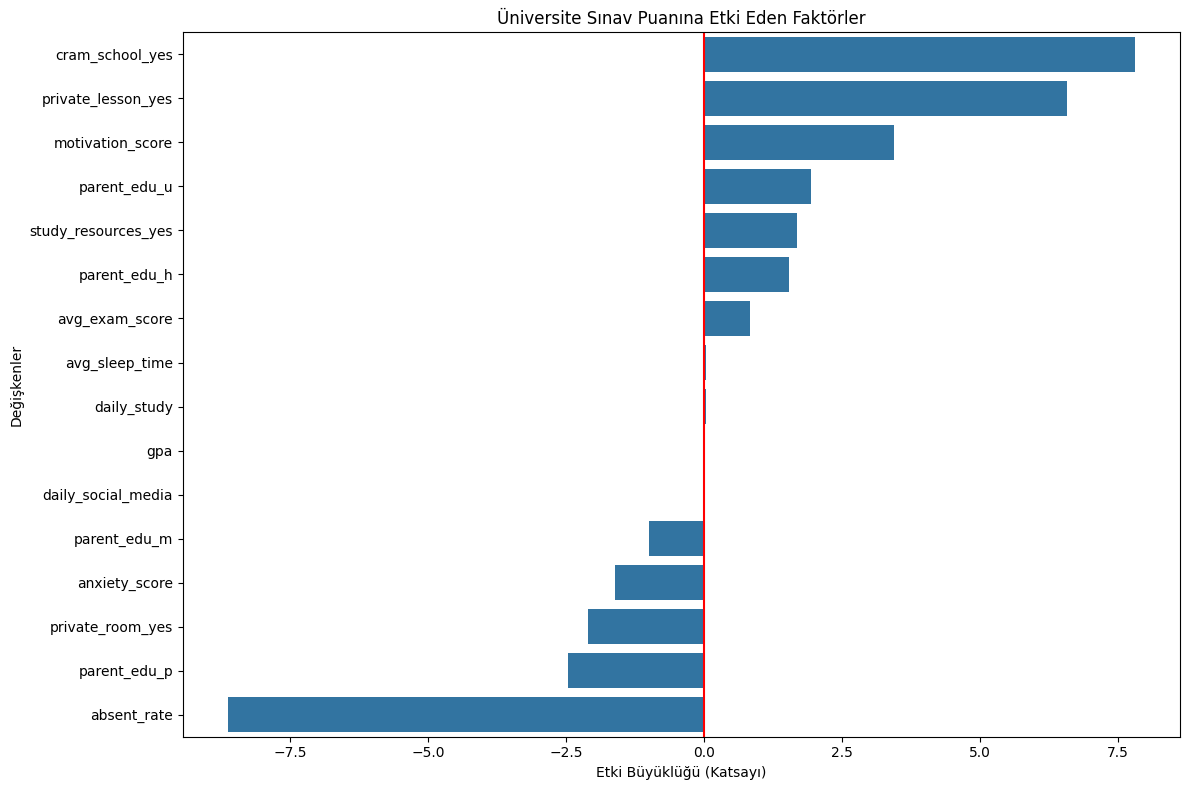

Üniversite Sınav Puanına Etki Eden Faktörler (Önem Sırasına Göre):
cram_school_yes: 7.8000
private_lesson_yes: 6.5731
motivation_score: 3.4378
parent_edu_u: 1.9423
study_resources_yes: 1.6720
parent_edu_h: 1.5278
avg_exam_score: 0.8377
avg_sleep_time: 0.0396
daily_study: 0.0299
gpa: -0.0219
daily_social_media: -0.0240
parent_edu_m: -1.0072
anxiety_score: -1.6082
private_room_yes: -2.1106
parent_edu_p: -2.4629
absent_rate: -8.6282


In [141]:
# Katsayıları alarak etki eden faktörleri analiz etme
coefficients = pd.DataFrame({
    'Değişken': X.columns,
    'Katsayı': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Katsayı', ascending=False)

# Katsayıları görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x='Katsayı', y='Değişken', data=coefficients)
plt.title('Üniversite Sınav Puanına Etki Eden Faktörler')
plt.xlabel('Etki Büyüklüğü (Katsayı)')
plt.ylabel('Değişkenler')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

# Özellik önem derecelerini yazdırma
print("Üniversite Sınav Puanına Etki Eden Faktörler (Önem Sırasına Göre):")
for index, row in coefficients.iterrows():
    print(f"{row['Değişken']}: {row['Katsayı']:.4f}")

In [126]:
#RIDGE REGRESSION

lambdalar = np.random.randint(0,1000,100)
ridge_cv = RidgeCV(alphas = lambdalar , scoring = "neg_mean_squared_error" , cv=10)
ridge_cv.fit(X_train,y_train) #cesitli lambda degerlerine karsılık cesitli hatalar hesaplayacak
the_alpha = ridge_cv.alpha_ #sonuclar icerisindeki en optimum parametre degerini alma

ridge_tuned = Ridge(alpha = the_alpha).fit(X_train , y_train) #bu lambdayı kullanarak modeli olusturmak 

#hata hesaplama
y_pred = ridge_tuned.predict(X_test)
ridge_mse = mean_squared_error(y_test , y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test , y_pred))
ridge_r2 = r2_score(y_test,y_pred)
print("Ridge Regresion Errors : ")
print("mse : " + str(ridge_mse))
print("rmse : " + str(ridge_rmse))
print("r2 score : " + str(ridge_r2))

Ridge Regresion Errors : 
mse : 613.9273254086967
rmse : 24.77755688942509
r2 score : 0.80229757241348


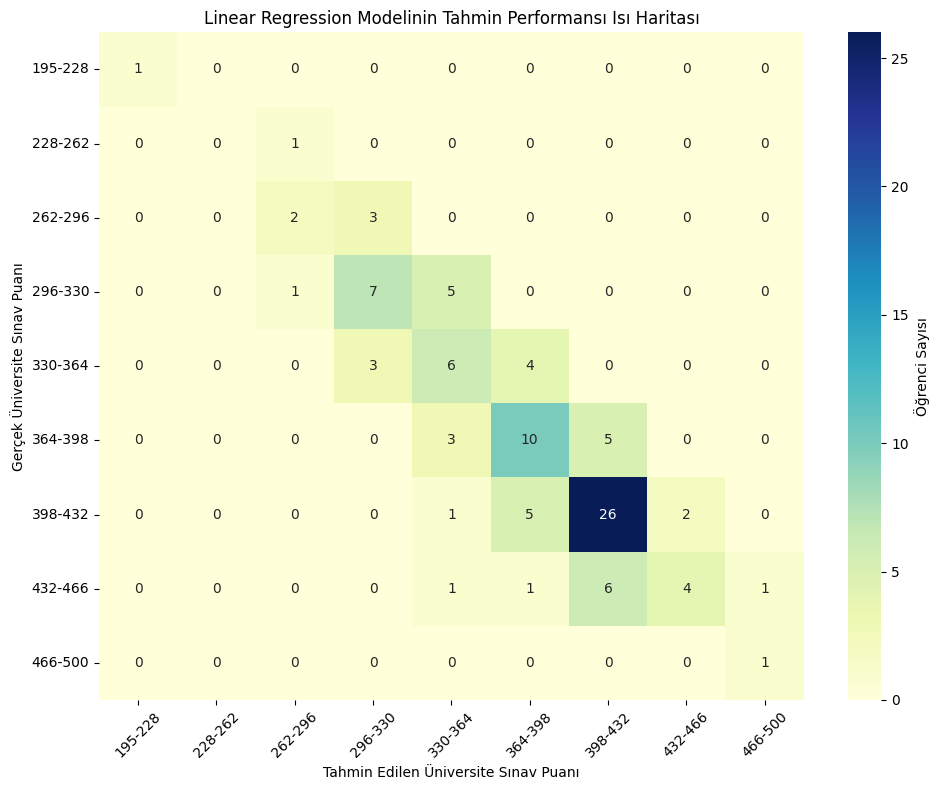

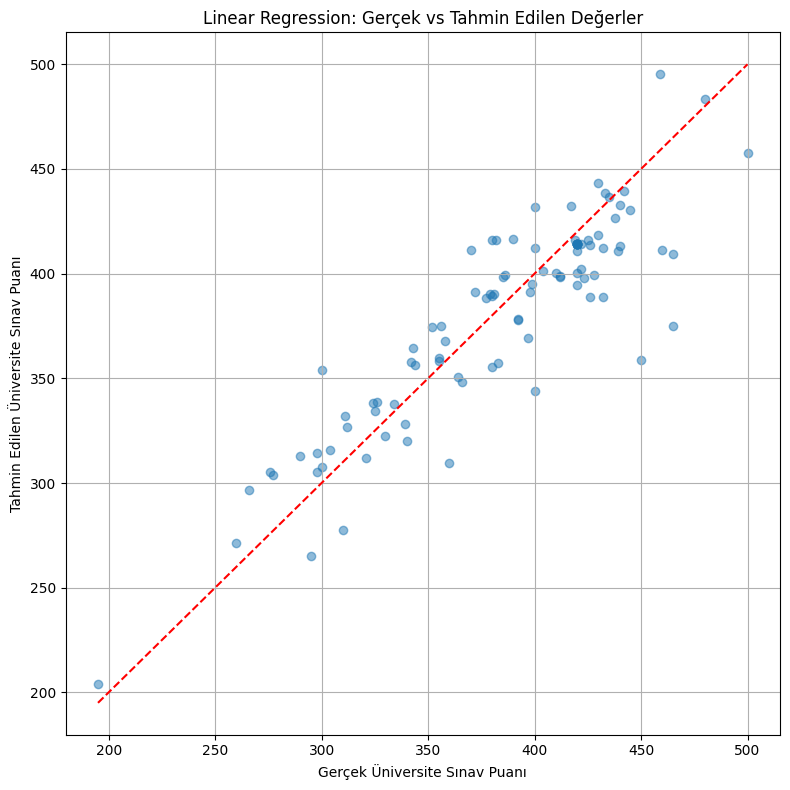

In [132]:
# Tahmin ve gerçek değerleri içeren bir DataFrame oluşturalım
import pandas as pd
comparison_df = pd.DataFrame({'Gerçek Değerler': y_test.values.flatten(), 'Tahmin Edilen Değerler': y_pred.flatten()})

# Isı haritası için veri hazırlama
# Gerçek ve tahmin değerlerini belirli aralıklara bölelim
min_score = min(comparison_df['Gerçek Değerler'].min(), comparison_df['Tahmin Edilen Değerler'].min())
max_score = max(comparison_df['Gerçek Değerler'].max(), comparison_df['Tahmin Edilen Değerler'].max())
score_range = np.linspace(min_score, max_score, 10)

# Gerçek ve tahmin değerlerini kategorilere ayıralım
heatmap_data = np.zeros((len(score_range)-1, len(score_range)-1))
for i in range(len(score_range)-1):
    for j in range(len(score_range)-1):
        heatmap_data[i, j] = np.sum(
            (comparison_df['Gerçek Değerler'] >= score_range[i]) & 
            (comparison_df['Gerçek Değerler'] < score_range[i+1]) &
            (comparison_df['Tahmin Edilen Değerler'] >= score_range[j]) & 
            (comparison_df['Tahmin Edilen Değerler'] < score_range[j+1])
        )

# Isı haritasını çizelim
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')

# Eksen etiketlerini ayarlayalım
score_labels = [f"{int(score_range[i])}-{int(score_range[i+1])}" for i in range(len(score_range)-1)]
plt.xticks(np.arange(len(score_labels))+0.5, score_labels, rotation=45)
plt.yticks(np.arange(len(score_labels))+0.5, score_labels, rotation=0)

plt.xlabel('Tahmin Edilen Üniversite Sınav Puanı')
plt.ylabel('Gerçek Üniversite Sınav Puanı')
plt.title('Linear Regression Modelinin Tahmin Performansı Isı Haritası')

# Renk çubuğu açıklaması
cbar = ax.collections[0].colorbar
cbar.set_label('Öğrenci Sayısı')

plt.tight_layout()
plt.show()

# Ayrıca gerçek değerler ve tahminler arasındaki ilişkiyi gösteren bir scatter plot çizelim
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min_score, max_score], [min_score, max_score], 'r--')  # Mükemmel tahmin çizgisi
plt.xlabel('Gerçek Üniversite Sınav Puanı')
plt.ylabel('Tahmin Edilen Üniversite Sınav Puanı')
plt.title('Linear Regression: Gerçek vs Tahmin Edilen Değerler')
plt.grid(True)
plt.tight_layout()
plt.show()

Linear Regression Modelinde Özelliklerin Etki Büyüklükleri (Sayısal Değerler):
cram_school_yes: 7.8000
private_lesson_yes: 6.5731
motivation_score: 3.4378
parent_edu_u: 1.9423
study_resources_yes: 1.6720
parent_edu_h: 1.5278
avg_exam_score: 0.8377
avg_sleep_time: 0.0396
daily_study: 0.0299
gpa: -0.0219
daily_social_media: -0.0240
parent_edu_m: -1.0072
anxiety_score: -1.6082
private_room_yes: -2.1106
parent_edu_p: -2.4629
absent_rate: -8.6282


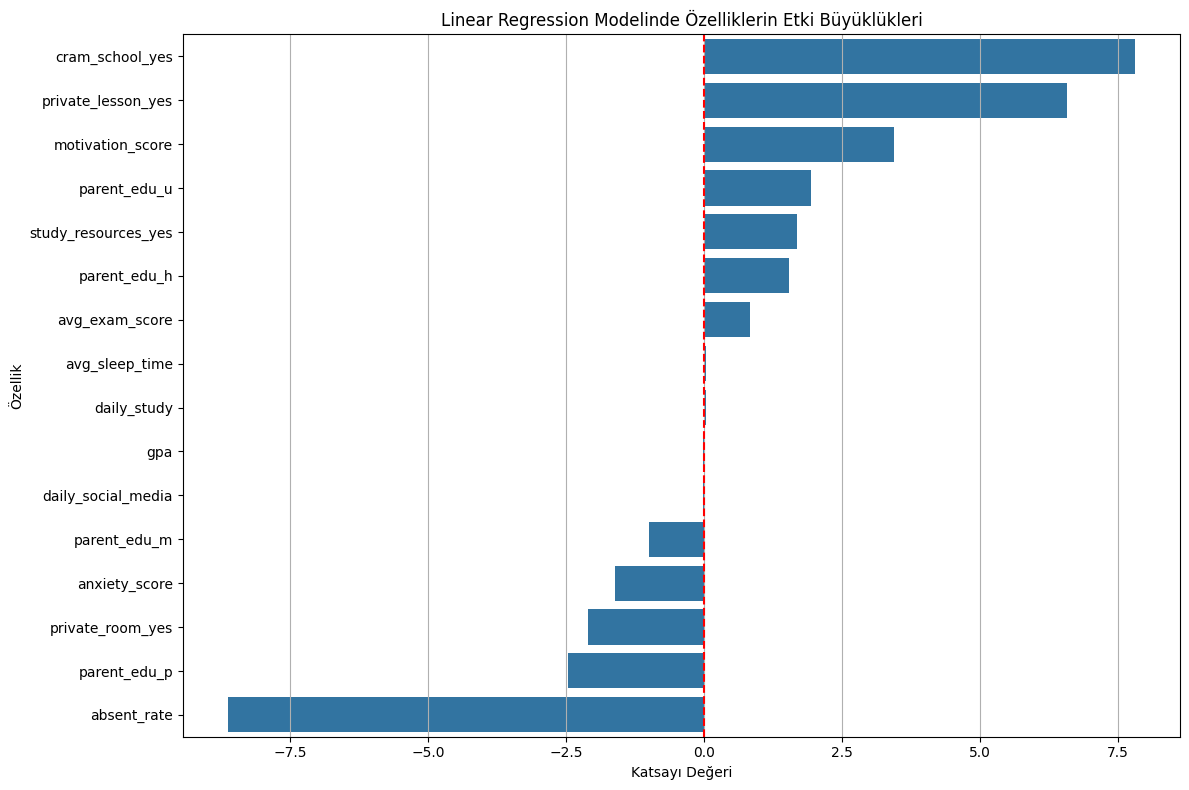

In [140]:
# Linear Regression modelinin katsayılarını görselleştirelim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Katsayıları bir DataFrame'e dönüştürelim
# linear_model.coef_ çok boyutlu bir dizi olabilir, düzleştirelim
coef_df = pd.DataFrame({
    'Özellik': X_train.columns,
    'Katsayı': linear_model.coef_.flatten() if linear_model.coef_.ndim > 1 else linear_model.coef_
})

# Katsayıları büyüklüklerine göre sıralayalım
coef_df = coef_df.sort_values('Katsayı', ascending=False)

# Katsayıları sayısal olarak konsola yazdıralım
print("Linear Regression Modelinde Özelliklerin Etki Büyüklükleri (Sayısal Değerler):")
for index, row in coef_df.iterrows():
    print(f"{row['Özellik']}: {row['Katsayı']:.4f}")

# Katsayıları görselleştirelim
plt.figure(figsize=(12, 8))
sns.barplot(x='Katsayı', y='Özellik', data=coef_df)
plt.title('Linear Regression Modelinde Özelliklerin Etki Büyüklükleri')
plt.xlabel('Katsayı Değeri')
plt.ylabel('Özellik')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [127]:
#LASSO REGRESSION

alphas = 10**np.linspace(10,-2,100)*0.5 
lasso_cv = LassoCV(alphas = alphas ,cv=10,max_iter = 100000).fit(X_train,y_train)
the_alpha = lasso_cv.alpha_
lasso_tuned = Lasso(alpha = the_alpha).fit(X_train,y_train) #modelini kuralım.

#hata hesaplama
y_pred = lasso_tuned.predict(X_test)
lasso_mse = mean_squared_error(y_test , y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test , y_pred))
lasso_r2 = r2_score(y_test,y_pred)
print("Lasso Regresion Errors : ")
print("mse : " + str(lasso_mse))
print("rmse : " + str(lasso_rmse))
print("r2 score : " + str(lasso_r2))

Lasso Regresion Errors : 
mse : 610.3751171212392
rmse : 24.705770927482494
r2 score : 0.8034414866402262


In [128]:
#ELASTICNET REGRESSION

enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train) #lambdalar girmedik , fonksiyonun kednisi bir deger uretti
the_alpha = enet_cv_model.alpha_
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_ ).fit(X_train,y_train)#buldugumuz optimum lambda ile modeli olusturalım ve fit edelim :

#hata hesaplama
y_pred = enet_tuned.predict(X_test)
enet_mse = mean_squared_error(y_test , y_pred)
enet_rmse = np.sqrt(mean_squared_error(y_test , y_pred))
enet_r2 = r2_score(y_test,y_pred)
print("ElasticNet Regresion Errors : ")
print("mse : " + str(enet_mse))
print("rmse : " + str(enet_rmse))
print("r2 score : " + str(enet_r2))

ElasticNet Regresion Errors : 
mse : 633.8386617785559
rmse : 25.1761526405159
r2 score : 0.7958855438656508


# MODEL DEGERLENDIRME

In [129]:
models = ["Linear Regression","Ridge Regression","Lasso Regression","ElasticNet Regression"]
mses = [linear_mse,ridge_mse,lasso_mse,enet_mse]
rmses = [linear_rmse,ridge_rmse,lasso_rmse,enet_rmse]
r2s = [linear_r2,ridge_r2,lasso_r2,enet_r2]

In [131]:
plt.figure(figsize=(18, 5))

# MSE plot
plt.subplot(1, 3, 1)
plt.bar(models, mses)
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.ylim(600, 640) 
plt.xticks(rotation=15)

# RMSE plot
plt.subplot(1, 3, 2)
plt.bar(models, rmses)
plt.title('Model Comparison - RMSE')
plt.ylabel('Root Mean Squared Error')
plt.ylim(23, 26) 
plt.xticks(rotation=15)

# R2 plot
plt.subplot(1, 3, 3)
plt.bar(models, r2s)
plt.title('Model Comparison - R2 Skoru')
plt.ylabel('R2 Score')
plt.ylim(0.79, 0.81)  
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

NameError: name 'linear_model' is not defined